## Libraries and Util

In [5]:
import itertools
import json
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score


def transformToList(inputString):
    s = inputString.translate(str.maketrans({'{': '[', '}': ']', '(': '[', ')': ']'}))
    s = s.replace('[', ' [ ')
    s = s.replace(']', ' ] ')
    s = s.replace(',', ' , ')
    words = s.split()
    output = ""
    for word in words:
        if word=="[" or word=="]" or word==",": output+=word
        else: output+='"'+word+'"'
    out = json.loads(output)
    try:
        a = np.array(out).astype(np.float).tolist()
    except:
        a = out
    return a

class Activation:
    def stepFunction(u):
        if u>0: return 1
        elif u<0: return 0
        else: return 0.5


class Utility:
    def augmentArray(a, value=1, position=0):
        return np.insert(a, position, value, axis=len(a.shape)-1)
    
    def sampleNorm(data, target, mainClass = 1):
        if len(data) != len(target):
            print("incompatible array sizes - sampleNorm")
            return
        for i in range(len(target)):
            if target[i] != mainClass:
                data[i] = [-x for x in data[i]]
        return data 

## Week 1

### Confusion Matrix and Metrics

#### Code

In [6]:
class Week1:
    def basic_metrics(y_true, y_pred, class_names, normalize=False):
        cm = confusion_matrix(y_true, y_pred)
        cm = cm[:,::-1][::-1]
        np.set_printoptions(precision=4)

        title='Confusion matrix'
        cmap=plt.cm.Blues
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=45)
        plt.yticks(tick_marks, class_names)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

        print(classification_report(y_true, y_pred, target_names=class_names[::-1],digits=4))
        plt.show()
        
    def setParams():
        class_names = transformToList(input("Enter names of classes in descending order eg [Two, One, Zero]:  "))
        y_true = transformToList(input("Enter true value of labels eg [1,1,0,1,0,1,1,2] 1D:  "))
        y_pred = transformToList(input("Enter predicted value of labels eg [1,0,1,1,0,1,0,2] 1D:  "))
        return class_names, y_true, y_pred

#### Run

Enter names of classes in descending order eg [Two, One, Zero]:  [Two, One, Zero]


<ipython-input-5-c2b487e065a8>:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.array(out).astype(np.float).tolist()


Enter true value of labels eg [1,1,0,1,0,1,1,2] 1D:  [1,1,0,1,0,1,1,2]
Enter predicted value of labels eg [1,0,1,1,0,1,0,2] 1D:  [1,1,0,0,0,2,1,2]
              precision    recall  f1-score   support

        Zero     0.6667    1.0000    0.8000         2
         One     1.0000    0.6000    0.7500         5
         Two     0.5000    1.0000    0.6667         1

    accuracy                         0.7500         8
   macro avg     0.7222    0.8667    0.7389         8
weighted avg     0.8542    0.7500    0.7521         8



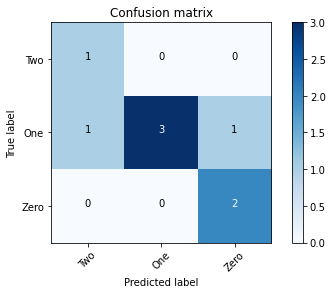

In [7]:
class_names, y_true, y_pred = Week1.setParams()
Week1.basic_metrics(y_true, y_pred, class_names)

## Week 2

### Batch Perceptron Learning

#### Code

In [ ]:
class BatchPerceptronLearning:
    def fit(X, Y, a, n):
        # ------------------------------------------------------------------------------------
        # Applying Sample Normalisation:
        Norm_Y = []

        for x, y in zip(X, Y):

            # If the sample belongs to the class with label 2 or -1 (Check dataset in question to see how formatted):
            if y != 1:
                x = [i * -1 for i in x]
                x.insert(0, -1)
                Norm_Y.append(x)
            else:
                x.insert(0, 1)
                Norm_Y.append(x)

        print("Vectors used in Batch Perceptron Learning Algorithm:\n {}\n".format(Norm_Y))

        # ------------------------------------------------------------------------------------
        # Batch Perceptron Learning Algorithm:

        epoch = 1

        while True:

            updating_samples = []
            print("Epoch {}".format(epoch))

            for count, i in enumerate(range(len(Norm_Y))):

                # Knowing which value of a to use. If it is the first iteration, than use the given parameters in the 
                # question:
                a_prev = a
                print("The value of a used is {}".format(a_prev))
                y_input = Norm_Y[i]
                print("y Value used for this iteration is: {}".format(y_input))

                # Equation -> g(x) = a^{t}y
                ay = np.dot(a, y_input)
                print("The value of a^t*y for this iteration is: {}".format(ay))


                # Checking if the sample is misclassified or not:

                # If sample is misclassified:
                if ay <= 0:

                    # If this is the first sample in the epoch, add the previous value of a to the list of samples used 
                    # for the update to perform summation at the end of the epoch:
                    if count == 0:
                        print("This sample is misclassified. This sample will be used in update.\n")
                        updating_samples.append(np.array(a))
                        updating_samples.append(np.array(y_input))

                    # If sample is misclassified and IS NOT the first sample in the epoch:
                    else:
                        print("This sample is misclassified. This sample will be used in update.\n")
                        updating_samples.append(np.array(y_input))

                # If sample is classified correctly:
                else: 

                    # If first sample in the epoch, append the previous value of a to the updating samples list:
                    if count == 0:
                        updating_samples.append(np.array(a))
                        print("This sample is classified correctly.\n")
                    else:
                        print("This sample is classified correctly.\n")

            # Calculating new value of a after having gone through all of the samples in the dataset since it is Batch Learning.
            a_update_val = n * sum(updating_samples)

            # If Block to check whether learning has converged. If we have gone through all the data without needing 
            # to update the parameters, we can conclude that learning has converged.
            if len(updating_samples) <= 1:
                print("\nLearning has converged.")
                print("Required parameters of a are: {}".format(a))
                break

            # Updating a using our new value of a:
            a = a_update_val
            print("\nNew Value of a^t is: {}.\n".format(a))

            epoch += 1
        
    def setParams():
        X_train = transformToList(input("Enter features eg [[1, 5], [2, 5], [4, 1], [5, 1]] 2D:  "))
        y_train = transformToList(input("Enter labels eg [1, 1, 2, 2] 1D:  "))
        a = transformToList(input("Enter a. Usually [1, w1, w2...] eg [-25, 6, 3] 1D:  "))
        lr = float(input("Enter the learning rate eg 1.  "))
        return X_train, y_train, a, lr

#### Run

In [ ]:
X_train, y_train, a, lr = BatchPerceptronLearning.setParams()
BatchPerceptronLearning.fit(X_train, y_train, a, lr)

### Sequential Perceptron Learing

#### Code

In [ ]:
class SequentialPerceptronLearning:
    def fit(X, Y, a, n):
        # ------------------------------------------------------------------------------------
        # Applying Sample Normalisation:
        Norm_Y = []

        for x, y in zip(X, Y):

            # If the sample belongs to the class with label 2 or -1 (Check dataset in question to see how formatted):
            if y != 1:
                x = [i * -1 for i in x]
                x.insert(0, -1)
                Norm_Y.append(x)
            else:
                x.insert(0, 1)
                Norm_Y.append(x)

        print("Vectors used in Sequential Perceptron Learning Algorithm:\n {}\n".format(Norm_Y))


        # ------------------------------------------------------------------------------------
        # Sequential Perceptron Learning Algorithm:

        epoch = 1

        while True:

            updating_samples = []
            print("Epoch {}".format(epoch))

            # Keeping track of how many samples are correctly classified. If this variable reaches 
            # the value that is equal to the size of the dataset (len), than we know that learning 
            # has converged:
            correctly_classified_counter = 0

            # Going through all of the samples in the dataset one-by-one:
            for i in range(len(Norm_Y)):

                # This chooses which weight to use for an iteration. If first iteration, uses given starting weight 
                # as described in question:
                a_prev = a
                print("The value of a used is {}".format(a_prev))

                # Selecting sample to use:
                y_input = Norm_Y[i]
                print("y Value used for this iteration is: {}".format(y_input))

                # Equation -> g(x) = a^{t}y
                ay = np.dot(a, y_input)
                print("The value of a^t*y for this iteration is: {}".format(ay))


                # Checking if the sample is misclassified or not:

                # If sample is misclassified:
                if ay <= 0:

                    print("This sample is misclassified. This sample will be used in update.\n")
                    updating_samples.append(np.array(a))
                    updating_samples.append(np.array(y_input))

                    # Calculating new value of a using update rule for Sequential Perceptron Learning Algorithm:
                    a_update_val = n * sum(updating_samples)

                    a = a_update_val
                    print("\nNew Value of a^t is: {}.\n".format(a))

                # If the sample is correctly classified:
                else: 
                    print("This sample is classified correctly.\n")
                    correctly_classified_counter += 1
                    pass

                # Reset sample to add for update to occur:
                updating_samples = []

            # If Block to check whether learning has converged. If we have gone through all the data without needing 
            # to update the parameters, we can conclude that learning has converged.
            if correctly_classified_counter == len(Norm_Y):
                print("\nLearning has converged.")
                print("Required parameters of a are: {}.".format(a))
                break

            epoch += 1
        
    def setParams():
        X_train = transformToList(input("Enter features eg [[0, 2], [1, 2], [2, 1], [-3, 1], [-2, -1], [-3, -2]] 2D:  "))
        y_train = transformToList(input("Enter labels eg [1, 1, 1, -1, -1, -1] 1D:  "))
        a = transformToList(input("Enter a. Usually [1, w1, w2...] eg [1, 0, 0] 1D:  "))
        lr = float(input("Enter the learning rate eg 1.  "))
        return X_train, y_train, a, lr

#### Run

In [ ]:
X_train, y_train, a, lr = SequentialPerceptronLearning.setParams()
SequentialPerceptronLearning.fit(X_train, y_train, a, lr)

### MultiClass perceptron learning

#### Code

In [ ]:
class SequentialMultiClassPerceptronLearning:
    def fit(X,y, a, eta):
    # N is the number of exemplars provided in the question
    # augmented_matrix is the augmented feature vector from the question
    # eta is the learning rate given in the question
    # omega is an array containing all the output classes of the feature vectors
        augmented_matrix = np.array(X).T
    # counter which keeps track of cases where winner_class == omega[index]
        N_counter = 0
        
        omega = np.array(y).astype(int).tolist()
        N = augmented_matrix.shape[1]
        number_of_classes = len(set(omega))
        number_of_features = augmented_matrix.shape[0]
        
        print(f'class nb:{number_of_classes} and number of features {number_of_features} and number of shit {N}')
        # Step 2. Initialise aj for each class
        at = np.array(a)
        #at = np.zeros((number_of_classes, number_of_features))
        
        for i in range(0, 15):
            print('Iteration: ', i+1)
            # Step 3. Find values of g1, g2 and g3 and then select the arg max of g
            index = i % N

            # Print updated a^t value
            print('a^t:')
            print(at)

            # Compute g value
            g = np.empty([number_of_classes])
            for i in range(len(g)):
                print('Calculation of g values..........')
                print('a^t is:', at[i])
                print('Index is:', index)
                print('Aug matrix is:', augmented_matrix[:, index])
                g[i] = at[i] @ augmented_matrix[:, index]

            print('g1 | g2 | g3')
            print(g)

            # Step 4. Select the winner
            # Logic for 0,0,0 case and similar ones where 2 gs can produce max value
            seen = []
            bRepeated = False
            # Check if there are multiple max values, and assign the winner class accordingly
            for number in g:
                if number in seen:
                    bRepeated = True
                    print("Number repeated!")
                    m = max(g)
                    temp = [index for index, j in enumerate(g) if j == m]
                    winner_class = max(temp) + 1
                else:
                    seen.append(number)
            # If all g values are unique, simply select the max value's class as the winner
            if(bRepeated == False):
                g = g.tolist()
                arg_max = max(g)
                winner_class = g.index(arg_max) + 1

            print('Winner class = ', winner_class,
                  ', and actual class is:', omega[index])

            # Compare winnner to actual class
            if(winner_class != omega[index]):
                # Step 4. Apply the update rule as per the algorithm

                # Increment the actual class value which is incorrectly classified
                at[omega[index]-1] = at[omega[index]-1] + \
                    eta * augmented_matrix[:, index]
                print('New loser value:', at[omega[index]-1])

                # Penalize the wrongly predicted Winner class
                at[winner_class-1] = at[winner_class-1] - \
                    eta * augmented_matrix[:, index]
                print('New winner value:', at[winner_class-1])

                # Reset counter to 0
                N_counter = 0
            else:
                print('No update is performed!')
                # Increment convergence counter which keeps track of cases where winner_class == omega[index]
                N_counter += 1
                if(N_counter == N):  # check for convergence
                    print('Value of N = ', N)
                    print('Value of N_counter = ', N_counter)
                    print('Learning has converged, so stopping...')
                    print('Final values of a^t after update....')
                    print('at')
                    print(at)
                    break
                print('N counter value = ', N_counter)
            print('at')
            print(at)
            print('=========================================================')


    def setParams():
        X_train = transformToList(input("Enter features eg [[1,0, 2], [1, 1, 2], [1, 2, 1], [1, -3, 1], [1, -2, -1], [1, -3, -2]] 2D:  "))
        y_train = transformToList(input("Enter labels eg [1, 1, 1, -1, -1, -1] 1D:  "))
        a = transformToList(input("Enter a. Usually [1, w1, w2...] eg [1, 0, 0] 1D:  "))
        lr = float(input("Enter the learning rate eg 1.  "))
        print(X_train, y_train, a, lr)
        return X_train, y_train, a, lr


#### Run

In [ ]:
X_train, y_train, a, lr = SequentialMultiClassPerceptronLearning.setParams()
SequentialMultiClassPerceptronLearning.fit(X_train, y_train, a, lr)

### Moore-Penrose Pseudoinverse

#### Code

In [ ]:
class Pseudoinverse:
    def fit(X, Y, b):
        # ------------------------------------------------------------------------------------
        # Applying Sample Normalisation:
        Norm_Y = []

        for x, y in zip(X, Y):

            # If the sample belongs to the class with label 2 or -1 (Check dataset in question to see how formatted):
            if y == -1 or y == 2:
                x = [i * -1 for i in x]
                x.insert(0, y)
                Norm_Y.append(x)
            else:
                x.insert(0, y)
                Norm_Y.append(x)

        print("Vectors used in Pseudoinverse operation to calculate parameters of linear discriminant function:\n {}\n".format(Norm_Y))

        # ------------------------------------------------------------------------------------
        # Initialising Y Matrix:
        Y_matrix = []

        # Adding each normalised sample in dataset to Y Matrix:
        for i in range(len(Norm_Y)):
            Y_matrix.append(Norm_Y[i])
        Y_matrix = np.array(Y_matrix)
        print("y Matrix being used:\n {}\n".format(Y_matrix))

        # Calculating pseudo-inverse of Y Matrix:
        pseudo_inv_matrix = np.linalg.pinv(Y_matrix)
        print("Pseudo-inverse Matrix is:\n {}\n".format(pseudo_inv_matrix))

        # Multiplying Pseudo-inverse matrix by given margin vector in question:
        a = np.matmul(pseudo_inv_matrix, b)
        print("a is equal to:\n {}\n".format(a))

        correct_classification = 0

        # Checking if classifications are correct:

        for sample in Norm_Y:
            ay = np.dot(sample, a)
            print("\ng(x) for sample {} is {}".format(sample, ay))

            # Sample is correctly classified if ay is positive:    
            if ay > 0:
                print("Sample has been correctly classified.")
                correct_classification += 1

        if correct_classification == len(Norm_Y):
            print("\nAll samples are classified correctly which means that discriminant function parameters are correct.")

        else:
            print("\nSome samples are misclassified.")
        
    def setParams():
        X_train = transformToList(input("Enter features eg [[0, 2], [1, 2], [2, 1], [-3, 1], [-2, -1], [-3, -2]] 2D:  "))
        y_train = transformToList(input("Enter labels eg [1, 1, 1, -1, -1, -1] 1D:  "))
        b = transformToList(input("Enter b eg [1, 1, 1, 1, 1, 1] 1D:  "))
        return X_train, y_train, b

#### Run

In [ ]:
X_train, y_train, b = Pseudoinverse.setParams()
Pseudoinverse.fit(X_train, y_train, b)

### Sequential Widrow Hoff Learning

#### Code

In [ ]:
class SequentialWidrowHoff:
    def fit(X, Y, a, b, n, iterations):
        # ------------------------------------------------------------------------------------
        # Applying Sample Normalisation:
        Norm_Y = []

        for x, y in zip(X, Y):

            # If the sample belongs to the class with label 2 or -1 (Check dataset in question to see how formatted):
            if y == -1 or y == 2:
                x = [i * -1 for i in x]
                x.insert(0, y)
                Norm_Y.append(x)
            else:
                x.insert(0, y)
                Norm_Y.append(x)

        print("Vectors used in Sequential Widrow-Hoff Learning Algorithm:\n {}\n".format(Norm_Y))


        # ------------------------------------------------------------------------------------
        # Sequential Widrow-Hoff Learning Algorithm

        # Epoch for-loop:
        for o in range(int(iterations / len(Norm_Y))):

            # This for-loop goes through each sample one-by-one:
            for i in range(len(Norm_Y)):

                # Value of a to use. If first iteration, then uses parameters given in question:

                a_prev = a

                # Which sample to use:
                y_input = Norm_Y[i]
                print("Sample used for this iteration is: {}".format(y_input))

                # Equation -> g(x) = a^{t}y
                ay = np.dot(a, y_input)
                print("g(x) = {}".format(ay))

                # Calculating the values for update:
                update = np.zeros(len(y_input))
                for j in range(len(y_input)): 

                    # Applying Update Rule of Sequential Widrow-Hoff Learning Algorithm:
                    update[j] = n * (b[i] - ay) * y_input[j]

                # Adding update to a:
                a = np.add(a, update)
                print("New Value of a^t is: {}\n".format(a))

        print("Gone through all of the iterations as asked for in question.")
        
    def setParams():
        X_train = transformToList(input("Enter features eg [[0, 2], [1, 2], [2, 1], [-3, 1], [-2, -1], [-3, -2]] 2D:  "))
        y_train = transformToList(input("Enter labels eg [1, 1, 1, -1, -1, -1] 1D:  "))
        a = transformToList(input("Enter a. Usually [1, w1, w2...] eg [1, 0, 0] 1D:  "))
        b = transformToList(input("Enter b eg [1, 0.5, 1.5, 1.5, 1.5, 1] 1D:  "))
        lr = float(input("Enter the learning rate eg 0.1:  "))
        epochs = int(input("Enter the number of epochs eg 12:  "))
        return X_train, y_train, a, b, lr, epochs

#### Run

In [ ]:
X_train, y_train, a, b, lr, epochs = SequentialWidrowHoff.setParams()
SequentialWidrowHoff.fit(X_train, y_train, a, b, lr, epochs)

## Week 3

### Neuron Output (with heavy side function)

#### Code

In [ ]:
class NeuronOutput:
    def fit(weight, threshold, x):
        summation = []
        for i in range(len(x)):
            summation.append(weight[i] * x[i])

        summation = np.sum(summation, 0) - threshold

        # Find output of neuron by applying heaviside function with given threshold:
        output = np.heaviside(summation, threshold)
        print("Output of neuron with input {} is {}.".format(x, output))
        
    def setParams():
        #This script is based off of Question 2 in Tutorial 3
        x = transformToList(input("Enter single sample/input eg [0.1, -0.5, 0.4] 1D:  "))
        weights = transformToList(input("Enter weigths from one layer to another eg [0.1, -5, 0.4] 1D:  "))
        threshold = float(input("Enter the threshold value eg 0:  "))
        return weights, threshold, x

#### Run

In [ ]:
weights, threshold, x = NeuronOutput.setParams()
NeuronOutput.fit(weights, threshold, x)

### Sequential Delta Learning ALTERNATIVE
code

In [ ]:
import numpy as np


def main(ip, targets, weights, threshold, learning_rate, epochs):
    ip = np.array(ip)
    targets = np.array(targets)
    weights.insert(0, -threshold)
    weights = np.array(weights)
    weights = weights.reshape(-1, 1)
    for _iter in range(epochs):
        for idx, x in enumerate(ip):
            data = np.insert(x, 0, 1)
            data = data.reshape(-1, 1)
            pred = (weights.T @ data).reshape(-1)[0]
            pred = 1 if pred > 0 else 0
            weights = weights - learning_rate * (pred - targets[idx]) * data
            print(weights.reshape(-1))




run

In [ ]:
# based on tutorial question. Change as needed
ip = [[0], [1]]
targets = [1, 0]
threshold = 1.5
weights = [2]
main(ip=ip, targets=targets, weights=weights,
     threshold=threshold, learning_rate=1, epochs=6)

### Batch and Sequential Delta Learning

#### Code

In [ ]:
class DeltaLearningModel:
    def __init__(self):
        self.w = None

    def fit(self, features, target, weights, threshold, lr, epochs, type = "S", display=True):
        x = Utility.augmentArray(features.astype(np.float), 1)
        self.w = Utility.augmentArray(weights.astype(np.float), -threshold)
        t = target.astype(np.float)
        print("Score Before Training : ", round(self.score(features, target)*100, 1), "%")
        
        count = 0
        for e in range(0,epochs):
            error=0
            if count>=epochs: break;
            for i in range(0,len(x)):
                y = Activation.stepFunction(x[i].dot(self.w))
                error += (t[i]-y)*x[i]
                
                if type.upper()=="S":
                    self.w = self.w+lr*error
                    if display:
                        count+=1
                        print(count, "\t H(wx) = ", round(y,4), "\t delta w or n(t-y)x = ", np.round(lr*error,4), "\t w = ", np.round(self.w,4))
                    error=0
            if type.upper()=="B":
                count+=1
                self.w = self.w+lr*error
                if display:
                    print(count, "\t Weight change = ", np.round(error,4), "\t w = ", np.round(self.w,4))
                
                
        
        print("Score After Training : ", round(self.score(features, target)*100, 1), "%")
        print("Final Weights (w) = ", self.w)
        
    def predict(self, X_values):
        x = Utility.augmentArray(X_values.astype(np.float), 1)
        myfunc = lambda t: Activation.stepFunction(t.dot(self.w))
        return np.apply_along_axis(myfunc, 1, x)
    
    def score(self, X_test, y_target):
        y_test = self.predict(X_test)
        return np.sum(y_test == y_target)/len(y_target)
    
    def setParams(self):
        batchOrSeq = str(input("'s' for sequential or 'b' for batch.  "))
        X_train = np.array(transformToList(input("Enter features eg [[0, 0], [0, 1], [1, 0], [1, 1]] 2D:  "))).astype(np.float)
        y_train = np.array(transformToList(input("Enter labels eg [0, 0, 0, 1] 1D:  "))).astype(np.float)
        initWeights = np.array(transformToList(input("Enter weights [w1, w2, ..., wd] eg [1, 1] 1D:  "))).astype(np.float)
        threshold = float(input("Enter the threshold value eg -0.5.  "))
        learningRate = float(input("Enter the learning rate eg 1.  "))
        epochs = int(input("Enter the number of epochs eg 4.  "))
        return X_train, y_train, initWeights, threshold, learningRate, epochs, batchOrSeq
    
    def newPred(self):
        ispredict = str(input("\nDo you want to predict using trained model? y/n.  "))
        while ispredict.upper()=="Y":
            x_pred = np.array(transformToList(input("Enter features eg [[0, 0], [0, 1], [1, 0], [1, 1]] 2D:  ")))
            print("Predicted values: ", self.predict(x_pred))
            ispredict = str(input("\nDo you want to predict using trained model? y/n.  "))

#### Run

In [ ]:
model = DeltaLearningModel()
X_train, y_train, initWeights, threshold, learningRate, epochs, batchOrSeq = model.setParams()
model.fit(X_train, y_train, initWeights, threshold, learningRate, epochs, batchOrSeq)
model.newPred()

### Softmax (For Competitive Learning Networks)

#### Code

In [ ]:
class Softmax:
    def fit(x, b=1):
        print("\nSoftmax of array: ", x, "\n")
        print(np.exp(x*b) / np.sum(np.exp(x*b), axis=0))
    
    def setParams():
        a = np.array(transformToList(input("Enter array eg [0.34, 0.73, -0.61] 1D:  "))).astype(np.float)
        beta = float(input("Enter Beta value (1 if not specified).  "))
        return a, beta

#### Run


In [ ]:
a, beta = Softmax.setParams()
Softmax.fit(a, beta)

### Negative Feedback Networks

#### Code

In [ ]:
class NegativeFeddbackNetwork:
    def fit(weights, iterations, x, alpha, activations):
        prev_activations = activations
        iteration = 1

        for i in range(iterations):

            print("Iteration {}".format(iteration))

            # Following block deals with calculating first equation: e = x - W^{T}y
            wT = np.array(weights).T
            wTy = np.dot(wT, activations)
            print("value of wTy {}".format(wTy))

            eT = x - wTy
            print("eT: {}".format(eT))
            e = np.array(eT).reshape((3, 1))

            # The following lines deal with calculating the update: y <- y + \alpha*W*e
            We = np.dot(weights, e)
            We = [j for i in We for j in i]
            print("We: {} ".format(We))

            alphaWe = np.dot(alpha, We)

            # Doing the actual update using the second equation:
            y = activations + alphaWe
            print("Value of y: {}\n".format(y))

            activations = y

            iteration += 1

        print("\nAfter {} iterations, the activation of the output neurons is equal to {}".format(iterations, activations))
        
    def setParams():
        print("This script is based off of Question 7 in Tutorial 3")
        x = transformToList(input("Enter single sample/input eg [1, 1, 0] 1D:  "))
        weights = transformToList(input("Enter weigths from one layer to another eg [[1, 1, 0], [1, 1, 1]] 2D:  "))
        activation = transformToList(input("Enter output layer initial activation eg [0, 0] 1D:  "))
        lr = float(input("Enter the learning rate/alpha eg 0.25.  "))
        epochs = int(input("Enter the number of epochs eg 5.  "))
        return weights, epochs, x, lr, activation

#### Run

In [ ]:
weights, epochs, x, lr, activation = NegativeFeddbackNetwork.setParams()
NegativeFeddbackNetwork.fit(weights, epochs, x, lr, activation)

## Week 4

### Radial Basis Function (RBF)

In [ ]:
import numpy as np

# --------------------------------INPUT--------------------------------#
X = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ]
)

Y = np.array([0, 1, 1, 0])

C = np.array(
    [
        [0, 0],
        [1, 1],
    ]
)
# ----------------------------------------------------------------------#


# ---------------------------------TEST---------------------------------#
X_predict = np.array(
    [
        [0.5, -0.1],
        [-0.2, 1.2],
        [0.8, 0.3],
        [1.8, 0.6]
    ]
)
# ----------------------------------------------------------------------#


# --------------Calculate rho and sigma for radial basis---------------#
center_dist = []
for i in range(0, len(C) - 1):
    for j in range(i + 1, len(C)):
        print(i, j)
        center_dist.append(np.sqrt(np.sum((C[i, :] - C[j, :]) ** 2)))

rho_max = np.max(center_dist)
rho_avg = np.average(center_dist)
nH = len(C)

print("\nHere there are the parameters when training the model with X:")
print("Rho max: ", rho_max)
print("Rho average: ", rho_avg)

sigma = rho_max / np.sqrt(2 * nH)       # Using rho-max
# sigma = 2 * rho_avg                   # Using rho-average
print("Sigma: ", sigma)


# -----------------------------CALCULATE OUTPUTS---------------------------#

def get_hidden_output(X, C, sigma):
    radial_basis_output = []
    for i in range(0, len(X)):
        hidden_node_outputs = []
        for j in range(0, len(C)):
            # Using Gaussian function
            hidden_node_outputs.append(np.exp(-np.sum((X[i] - C[j]) ** 2)) / (2 * sigma * sigma))
        radial_basis_output.append(hidden_node_outputs)

    print("Radial basis layer output: ")
    print(np.round(radial_basis_output, 2))
    return radial_basis_output

# Get output from hidden rbf layer
radial_basis_output = get_hidden_output(X, C, sigma)

# Add bias to hidden layer output
radial_basis_output = np.c_[radial_basis_output, np.ones(len(radial_basis_output))]
radial_basis_output_transposed = np.transpose(radial_basis_output)

# Least squares method to calculate weights
weights = np.dot(
    np.dot(
        np.linalg.inv(
            np.dot(radial_basis_output_transposed, radial_basis_output)
        ), radial_basis_output_transposed
    ), Y
)
print("Weights between hidden-output layer: ", np.round(weights, 2))

# Get output of final layer
calculated_output = np.dot(radial_basis_output, weights)
print("Output of network: ", np.round(calculated_output, 2))

# Apply basic sign function with 0.5 threshold or call any other activation function
final_output = np.where(calculated_output > 0.5, 1, 0)
print("Signed output of network: ", final_output)

# ---------------------------------------------------------------------------#


# ------------------------------PREDICT TEST OUTPUT---------------------------#

print("\nHere it follows the parameters when predicting X_predict")

# Get output of hidden rbf layer
hidden_output = get_hidden_output(X_predict, C, sigma)

# Get output of final output layer
predicted_output = np.dot(np.c_[hidden_output, np.ones(len(hidden_output))], weights)
print("Output of test samples: ", np.round(predicted_output, 2))

test_output = np.where(predicted_output > 0.5, 1, 0)
print("Signed Output of test samples: ", test_output)

### Multi Layer NN - Feedforward and Backpropagation

In [ ]:
import numpy as np
import time
from sklearn.metrics import accuracy_score, mean_squared_error

np.set_printoptions(suppress=True)

class MLN():
    """ 
        MLN: This stands for Multi layer Network of Neurons. 
        This MLN classifier is modular. So it is not built with any set
        amount of layers or any specific activation function in mind.
        When an MLN object is created you can add any amount of layers
        and any activation function implimented (Sigmoid, Tanh and Softmax)
    """
    
    def __init__(self, random_seed=0):
        """ 
            Initalizing the class simply sets a random seed so that we can get 
            consistent values when trying to tweak our hyper parameters
            it also initalizes all the lists that we will use for our MLN
            I decided to have every node have its own bias rather than share one with 
            the entire layer, This should result in better performace.
            
            Parameters:
            random_seed (int): seed value for numpy random.
        
        """
        np.random.seed(random_seed)
        self.layersInfo = []        # Stores the size and activation of all layers.
        self.layersValue = []       # Stores the output of all layers
        self.weights = []           # Stores the weights of all connections
        self.biases = []            # Stores the biases of all nodes
        self.deltaWeights = []      # Stores the change of the weights when learning
        self.deltaBiases = []       # Stores the change of the biases when learning
        self.deltaNet = []          # Stores delta of the activation output (net)
        self.deltaActivation = []   # Stores delta of the activation input
    
    def addLayer(self, size, activation, weights=None, bias=None, input_size=0):
        """
            This funtion allows for any number of layers to be added to the netowrk.
            Calling this fucntion once adds one layer. It does this by populating our lists
            eg. layerInfo, layerValue, weights and biases. weights and biases are randomized
            between -1 and 1 while layerValue is set to 0 for all nodes in the layer.
            
            Parameters:
            size (int): the number of nodes in this layer.
            activation (string): the type of activation function. ("sigmoid", "tanh", "softmax")
            input_size (int): the size of input coming into the layer. Needed for first layer only.
        """
        if input_size == 0:
            input_size = self.layersInfo[-1][0]

        self.layersInfo.append([size, activation])
        self.layersValue.append(np.zeros(size))
        
        if weights == None:
            self.weights.append(np.random.uniform(-1,1,(size,input_size)))
        else:
            self.weights.append(np.array(weights))
        if bias == None:
            self.biases.append(np.random.uniform(-1, 1, size))
        else:
            self.biases.append(np.array(bias))


    def oneHotEncode(self, a):
        """
            Simple function takes an array and performs 
            one hot ecoding on it.
            
            Parameters:
            a (list/array): a list or np.array to be encoded
            
            Returns:
            b (array): one hot encoded array of a
        """
        b = np.zeros((a.size, a.max()+1))
        b[np.arange(a.size),a] = 1
        return b

    def logSigmoid(self, u):
        """
            Simple function takes an array and performs sigmoid 
            function on all numbers in array.
            
            Parameters:
            u (list/array): a list or np.array to be tranformed
            
            Returns:
            (array): sigmoid transformation of u
        """
        return 1.0 / (1.0 + np.exp(-u))
    
    def symmetricSigmoid(self, u):
        return (2.0 / (1.0 + np.exp(-2*u))) - 1
    
    def gradSymmetricSigmoid(self, u):
        return (4.0 * np.exp(-2*u)) / (1.0 + np.exp(-2*u))**2

    def gradLogSigmoid(self, u):
        """
            Simple function takes an array and finds sigmoid gradient 
            of all numbers in array.
            
            Parameters:
            x (list/array): a list or np.array to be tranformed
            
            Returns:
            dt (array): sigmoid gradient transformation of x
        """
        return u*(1-u)

    def tanh(self, x):
        """
            Simple function takes an array and performs tanh 
            function on all numbers in array.
            
            Parameters:
            x (list/array): a list or np.array to be tranformed
            
            Returns:
            (array): tanh transformation of x
        """
        return np.tanh(x)

    def gradTanh(self, x):
        """
            Simple function takes an array and finds tanh gradient 
            of all numbers in array.
            
            Parameters:
            x (list/array): a list or np.array to be tranformed
            
            Returns:
            dt (array): tanh gradient transformation of x
        """
        t = self.tanh(x)
        dt=1-t**2
        return dt

    def softmax(self, u):
        """
            Simple function takes an array and performs softmax 
            function on all numbers in array.
            
            Parameters:
            u (list/array): a list or np.array to be tranformed
            
            Returns:
            (array): sofmax transformation of u
        """
        e = np.exp(u - np.max(u))
        return e / e.sum(axis=0)

    def cross_entropy(self, t, y):
        """
            Cross entropy loss function, used because it is 
            a multicalssification problem
            
            Parameters:
            t (list/array): the expected ouput
            y (list/array): the predicted ouput
            
            Returns:
            error (array): cross enthropy loss values for all classes
        """
        error=np.multiply(y,t)
        error=np.mean(-np.log(error[error!=0]))
        return error
    
    def mse(self,t, y):
        return mean_squared_error(t, y)
        
    def forwardPass(self, x, printPass=True):
        """
            This performs a single forward pass through the network
            It will update the layer values which are stored in layersValue
            
            Paramters:
            x (list/array):the input to run through our network
        """
        if printPass: print("Forward Pass: ")
        for i in range(len(self.layersInfo)):
            if i != 0: x = self.layersValue[i-1]
            
            net = self.weights[i].dot(x)+self.biases[i]

            if self.layersInfo[i][1].lower() == "logsigmoid":
                self.layersValue[i] = self.logSigmoid(net)
            elif self.layersInfo[i][1].lower() == "symmetricsigmoid":
                self.layersValue[i] = self.symmetricSigmoid(net)
            elif self.layersInfo[i][1].lower() == "tanh":
                self.layersValue[i] = self.tanh(net)
            elif self.layersInfo[i][1].lower() == "linear":
                self.layersValue[i] = net
            elif self.layersInfo[i][1].lower() == "softmax":
                self.layersValue[i] = self.softmax(net)
            
            if printPass: print(self.layersInfo[i], self.layersValue[i])
        if printPass: print("\n")

    def backpropagation(self, x, y):
        """
            This performs iterative backpropagation through the network
            This will only perform one full step of backpropagation but will not update
            the weights, rather the change for the weights and biases will be stored 
            in deltaWeights and deltaBiases.
            
            Parameters:
            x (list/array): the input value of the last foward pass
            y (list/array): one hot encoded list of expected output for x
        """
        noLayers = len(self.layersValue)-1
        self.deltaNet[noLayers] = (self.layersValue[noLayers] - y)
        for k in range(noLayers, -1, -1):
            if k == 0: prevValue = x
            else: prevValue = self.layersValue[k-1]

            self.deltaWeights[k] += prevValue * self.deltaNet[k][:, None]
            self.deltaBiases[k] += self.deltaNet[k]
            
            if k != 0:
                self.deltaActivation[k-1] = self.deltaNet[k][:,None] * self.weights[k]
                if self.layersInfo[k-1][1].lower() == "tanh":
                    gradAactivation = self.gradTanh(self.layersValue[k-1])
                elif self.layersInfo[k-1][1].lower() == "symmetricsigmoid":
                    gradAactivation = self.gradSymmetricSigmoid(self.layersValue[k-1])
                elif self.layersInfo[k-1][1].lower() == "logsigmoid":
                    gradAactivation = self.gradLogSigmoid(self.layersValue[k-1])
                self.deltaNet[k-1] = np.sum(np.multiply(self.deltaActivation[k-1], gradAactivation), axis = 0)
        print("Delta weights: ", self.deltaWeights)
        print("Delta biases: ", self.deltaBiases)
        print("\n")

    def resetDeltaWeights(self):
        """
            This resets all the values of all delta lists to 0
            because they will need to be reset after every weight and bias 
            update.
        """
        self.deltaWeights = []
        self.deltaBiases = []
        self.deltaNet = []
        self.deltaActivation = []
        for i in self.weights:
            self.deltaWeights.append(np.zeros(i.shape))
        for i in self.biases:
            self.deltaBiases.append(np.zeros(i.shape))
        for i in self.layersValue:
            self.deltaNet.append(np.zeros(i.shape))
            self.deltaActivation.append(np.zeros(i.shape))

    def fit(self, X_train, y_train, lr, epochs, batch=True, oneHot=False):
        """
            This function is what is called to perform learning on the network.
            It iteratively calls forward pass then backpropagation. Once backproagation gives the 
            changes to weights and biases we can update them either using batch or stacastic
            gradient decent.
            
            There is learning rate decay implimented, if the accuracy has not changed by more than 1% then
            it most likely means we are bouncing around within a loss minima so we reduce the learing rate
            to take smaller steps in the gradient decent. This saves alot of time by reducing the amount of epochs
            needed to reach the minima.
            
            There is early stopping implimented, which is performed using the accuracy metric.
            
            Parameters:
            X_train (np.array): Data to train Network on
            y_train (np.array): labels of X_train data
            lr (float): the learning rate of the network
            epochs (int): the number of iterations to learn for
            batch (bool): if true then use batch gradient decent to learn
                          if false use stocastic gradient decent to learn
            printStats (bool): if true print network statistics while learning
            checkFreq (int): how often should we print stats and how often should we check for early stopping criteria
            earlyStopAcc (int): number of consecutive same accuracy value before early stopping is executed
                                eg if earlyStopAcc = 4 then if we get 80 accuracy 4 times in a row then stop learning
            
        """
        start = time.time()
        if oneHot:
            Y = self.oneHotEncode(y_train)
        else:
            Y = y_train
        X = X_train

        for epoch in range(epochs):
            self.resetDeltaWeights()
            for x, y in zip(X, Y):
                self.forwardPass(x)
                self.backpropagation(x, y)
                if not batch:
                    self.weights = list(np.array(self.weights) - lr*np.array(self.deltaWeights))
                    self.biases = list(np.array(self.biases) - lr*np.array(self.deltaBiases))
                    self.resetDeltaWeights()
            if batch:
                self.weights = list(np.array(self.weights) - lr*np.array(self.deltaWeights)/len(X))
                self.biases = list(np.array(self.biases) - lr*np.array(self.deltaBiases)/len(X))

            
            if oneHot:
                loss = self.cross_entropy(Y, self.predict(X, oneHot))
            else:
                loss = self.mse(Y, self.predict(X, oneHot))
                
            if oneHot:
                acc = self.accuracy(X, y_train)
            else:
                acc = 0
            print ("Epoch: ", epoch, "Loss: ", round(loss, 5), "accuracy: ",  round(acc*100, 5), "%")
            

        end = time.time()
        print ("Time to train network (seconds): ", round(end - start, 3))

    def predict(self, X_pred, oneHot=False, printPass=False):
        """
            This funtion takes a list of lists and returns the 
            predicted output for all of them.
            
            Parameters:
            X_pred (list of lists): a 2D list which you want to feed to the network to get the predictions
            onHot (bool): if True the it will return the prediction as a one hot encoding
            
            Returns:
            (list of lists): predicted output of X_pred
        """
        pred=[]
        if printPass: print("\n\nPrediction:")
        for x in X_pred:
            self.forwardPass(x, printPass)
            pred.append(self.layersValue[-1])
        if not oneHot: return pred
        return np.argmax(pred, axis=1)

    def accuracy(self, X_pred, t):
        """
            Simply returns the accuracy of the network
            
            Parameters:
            X_pred (list of lists): a 2D list which you want to feed to the network to get the predictions
            t (list/array): target outcomes of X_pred (not one hot encoded)
            
            Returns: 
            (float): X_pred accuracy of the model
        """
        y_pred = self.predict(X_pred)
        return accuracy_score(t, y_pred)

#### Run Feedforward + Backpropagation

In [1]:
data = [[0.1, 0.9]]
target = [[0.5]]

outputNo = 2
noFeatures = 4

model = MLN(3)
model.addLayer(3, "symmetricsigmoid",weights=[[0.5, 0], [0.3, -0.7]], bias=[0.2, 0], input_size=2)
model.addLayer(outputNo, "symmetricsigmoid",weights=[[0.8, 1.6]], bias=[-0.4])
model.fit(data, target, 0.25, 1, batch=False)
# model.predict(data, printPass=True)

NameError: name 'MLN' is not defined

#### Run Feedforward only

In [ ]:
data = [[1,0,1,0]] # Example of a single 4D sample to predict
target = [[1]] # Its target class is 1.

outputNo = 2 # Nodes in the output layer
noFeatures = 4 # Features in the sample 


model = MLN(3) # Create a NN with 3 layers (including the input and the output layer)

# [-0.7057, 0.49, 0.9438], [4.9061, 1.9324, -5.4160], [2.6605, -0.4269, -0.3431], [-1.1359, -5.1570, -0.2931]]
# [[-0.7057, 4.9061, 2.6605, -1.1359],[0.49, 1.9324, -0.4269, -5.1570],[0.9438, -5.4160, -0.3431, -0.2931]]
# Add an hidden layer. Since you are only doing FeedForward, you will need to specify the weights between each node
# in the layer and each input node (feature). Every row in weights correspond to a row in W
model.addLayer(3, "symmetricsigmoid",weights=[[-0.7057, 4.9061, 2.6605, -1.1359],[0.49, 1.9324, -0.4269, -5.1570],[0.9438, -5.4160, -0.3431, -0.2931]], bias=[4.8432, 0.3973, 2.1761], input_size=2)

# [[-1.1444, 0.0106], [0.3115, 11.5477], [-9.9812, 2.6479]]
# [[-1.1444, 0.3115, -9.9812], [0.0106, 11.5477, 2.6479]]
# Add the ouptu layer. Since you are only doing FeedForward, you will need to specify the weights between each node
# in the output layer and each node in the preceiding hidden layer. Every row in weights correspond to a row in W
model.addLayer(outputNo, "logsigmoid",weights=[[-1.1444, 0.3115, -9.9812], [0.0106, 11.5477, 2.6479]], bias=[2.5230, 2.6463])

# Call predict
model.predict(data, printPass=True)

## Week 5

### Activation Function Operations

#### Code

In [24]:
class ActivationFunctionOperations:
    '''
    Based on Question 4 in Tutorial 5:
    The following array show the output produced by a mask in a convolutional layer of a CNN.
              [[1, 0.5, 0.2], 
     net_j =  [-1, -0.5, -0.2], 
              [0.1, -0.1, 0]]
    Calculate the values produced by the application of the following activation functions:
    '''

    def fit(net_j, activation_function, a = 0.1, threshold = 0.1, heaviside_0 = 0.5):

        new_array = []

        if activation_function == 'ReLU':

            for row in net_j:
                temp_array = []
                for i in row:

                    # threshold:
                    if i >= 0:
                        temp_array.append(i)
                    else:
                        temp_array.append(0)
                new_array.append(temp_array)

            print(activation_function, ":  ", new_array)

        elif activation_function == 'LReLU':

            for row in net_j:
                temp_array = []
                for i in row:

                    # threshold:
                    if i >= 0:
                        temp_array.append(i)
                    else:
                        temp_array.append(round(a * i, 2))
                new_array.append(temp_array)

            print(activation_function, ":  ", new_array)

        elif activation_function == 'tanh':

            for row in net_j:
                temp_array = []
                for i in row:

                    # Using equation of tanh activation function:
                    temp_array.append(round((math.e**i - math.e ** -i) / (math.e**i + math.e ** -i), 5)) 
                new_array.append(temp_array)

            print(activation_function, ":  ", new_array)

        elif activation_function == 'heaviside':

            for row in net_j:
                temp_array = []
                for i in row:

                    # subtracts threshold away from each value:
                    i = i - threshold

                    # applies heaviside function to value:
                    temp_array.append(np.heaviside(i, heaviside_0))

                new_array.append(temp_array)

            print(activation_function, ":  ", new_array)
            
    def setParams():
        
        activation_function = "ReLU"
        a = 0.1
        threshold = 0.1
        heaviside_0 = 0.5
        
        net_j = transformToList(input("Enter matrix to perform activation on eg [[1, 0.5, 0.2], [-1, -0.5, -0.2], [0.1, -0.1, 0]] 2D:  "))
        typeActivation = str(input("'ReLU', 'LReLU', 'tanh' or 'heaviside' "))
        if typeActivation.upper()=="RELU":
            activation_function = "ReLU"
        elif typeActivation.upper()=="LRELU":
            activation_function = "LReLU"
            a = float(input("Enter the a value eg 0.1.  "))
        elif typeActivation.lower()=="tanh": 
            activation_function = "tanh"
        elif typeActivation.lower()=="heaviside": 
            activation_function = "heaviside"
            threshold = float(input("Enter the threshold value eg 0.1.  "))
            heaviside_0 = float(input("Enter the H(0) value eg 0.5.  "))
        else:
            print("wrong input")
            
        return net_j, activation_function, a, threshold, heaviside_0

#### Run

In [25]:
net_j, activation_function, a, threshold, heaviside_0 = ActivationFunctionOperations.setParams()
ActivationFunctionOperations.fit(net_j, activation_function, a, threshold, heaviside_0)

Enter matrix to perform activation on eg [[1, 0.5, 0.2], [-1, -0.5, -0.2], [0.1, -0.1, 0]] 2D:  [[1, 0.5, 0.2], [-1, -0.5, -0.2], [0.1, -0.1, 0]]
'ReLU', 'LReLU', 'tanh' or 'heaviside' LReLU
Enter the a value eg 0.1.  0.1
LReLU :   [[1.0, 0.5, 0.2], [-0.1, -0.05, -0.02], [0.1, -0.01, 0.0]]


### Batch Normalisation

#### Code

In [14]:
import numpy as np
np.set_printoptions(suppress=True, precision=8)

def batch_normalization(batch, beta, gamma, epsilon):
    mean = np.zeros(batch[0].shape)
    for X in batch:
        mean = mean + X
    mean = mean / len(batch)

    variance = np.zeros(batch[0].shape)
    for X in batch:
        variance = variance + (X - mean) ** 2
    variance = variance / len(batch)

    batch_normalized = list()
    for X in batch:
        batch_normalized.append(beta + gamma * (X - mean) / np.sqrt(variance + epsilon))

    return batch_normalized

#### Run

In [18]:
X1 = np.array([[1, 0.5, 0.2], [-1, -0.5, -0.2], [0.1, -0.1, 0]])
X2 = np.array([[1, -1, 0.1], [0.5, -0.5, -0.1], [0.2, -0.2, 0]])
X3 = np.array([[0.5, -0.5, -0.1], [0, -0.4, 0], [0.5, 0.5, 0.2]])
X4 = np.array([[0.2, 1, -0.2], [-1, -0.6, -0.1], [0.1, 0, 0.1]])
beta = 0
gamma = 1
epsilon = 0.1

# ---------------------
for i, a in enumerate(batch_normalization((X1, X2, X3, X4), beta, gamma, epsilon)):
    print(f"X{i+1}:\n {a}\n")

X0:
 [[ 0.69787657  0.58722022  0.56568542]
 [-0.86516068  0.         -0.3086067 ]
 [-0.3509312  -0.36115756 -0.22941573]]

X1:
 [[ 0.69787657 -1.17444044  0.28284271]
 [ 1.21122495  0.          0.        ]
 [-0.07018624 -0.60192927 -0.22941573]]

X2:
 [[-0.37577969 -0.58722022 -0.28284271]
 [ 0.51909641  0.3086067   0.3086067 ]
 [ 0.77204865  1.08347268  0.38235956]]

X3:
 [[-1.01997344  1.17444044 -0.56568542]
 [-0.86516068 -0.3086067   0.        ]
 [-0.3509312  -0.12038585  0.07647191]]



### Convolution Layer (padding, stride, dilation)

#### Code

In [32]:
import numpy as np
np.set_printoptions(suppress=True, precision=8)

def convolution_layer(feature_maps, mask_channels, padding, stride, dilation):
    nh, nw = feature_maps[0].shape
    mh, mw = mask_channels[0].shape
    nh_out, nw_out = int((nh + 2 * padding - mh ) / stride) + 1 - (dilation - 1), int((nw + 2 * padding - mw ) / stride) + 1 - (dilation - 1)
    out = np.zeros((nh_out, nw_out))
    for i in range(nh_out):
        for j in range(nw_out):
            for X, H in zip(feature_maps, mask_channels):
                X = np.pad(X, padding)
                if stride != 0:
                    i_start = i * stride
                    j_start = j * stride
                else:
                    i_start = i
                    j_start = j
                i_end = i_start + mh * dilation - dilation + 1
                j_end = j_start + mw * dilation - dilation + 1
                out[i, j] = out[i, j] + np.sum(X[i_start:i_end:dilation, j_start:j_end:dilation] * H)
    return out

#### Run

In [33]:
# Initialise your matrices that needs to go through the convolutional layer
feature_maps = list()
feature_maps.append(np.array([[0.2, 1, 0], [-1, 0, -0.1], [0.1, 0, 0.1]]))
feature_maps.append(np.array([[1, 0.5, 0.2], [-1, -0.5, -0.2], [0.1, -0.1, 0]]))

# Initialise the masks
mask_channels = list()
mask_channels.append(np.array([[1, -0.1], [1, -0.1]]))
mask_channels.append(np.array([[0.5, 0.5], [-0.5, -0.5]]))

#Set the desired padding, stride, and dilation
padding = 0 # NOTE padding should be set to 0 if not provided
stride = 1 # NOTE stride should be set to 1 if not provided
dilation = 1 # NOTE dilation should be set to 1 if not provided

#----------------------------------------------------------------------------#
convolution_layer(feature_maps, mask_channels, padding=padding, stride=stride, dilation=dilation)

array([[ 0.6 ,  1.71],
       [-1.65, -0.3 ]])

### Convolution Layer (pooling)

#### Code

In [34]:
import numpy as np
np.set_printoptions(suppress=True, precision=8)

def pooling_layer(feature_maps, pool_size, stride, pooling='max'):
    nh, nw = feature_maps[0].shape
    nh_out, nw_out = int((nh - pool_size[0]) / stride) + 1, int((nw - pool_size[1]) / stride) + 1
    out_maps = list()
    for X in feature_maps:
        out = np.zeros((nh_out, nw_out))
        for i in range(nh_out):
            for j in range(nw_out):
                i_start = i * stride
                j_start = j * stride
                i_end = i_start + pool_size[0]
                j_end = j_start + pool_size[1]
                if pooling == 'avg':
                    out[i, j] = np.average(X[i_start:i_end, j_start:j_end])
                else:
                    out[i, j] = np.max(X[i_start:i_end, j_start:j_end])
        out_maps.append(out)
    return(out_maps)

#### Run

In [36]:
# Enter the matrix to apply pooling on.
feature_maps = list()
feature_maps.append(np.array([[0.2, 1, 0, 0.4], [-1, 0, -0.1, -0.1], [0.1, 0, -1, -0.5], [0.4, -0.7, -0.5, 1]]))

#Set the desired stride and pooling
stride = 2 # NOTE stride should be set to 1 if not provided
pooling = 'avg' # It can be either 'avg' or 'max'

# Set the dimension of the pooling
x1 = 2
x2 = 2 # This is a 2x2 pooling

#-------------------------------------------------------------------#
output = pooling_layer(feature_maps, (x1, x2), stride=stride, pooling=pooling)
print(output)

[array([[ 0.05,  0.05],
       [-0.05, -0.25]])]


### Convolution Layer - output size

#### Code

In [ ]:
def get_output_size(input_size, mask_size, padding, stride, dilation=1):
    (nh, nw, nc) = input_size
    (mh, mw, mc) = mask_size
    nh_out, nw_out = int((nh + 2 * padding - mh) / stride) + 1 - (dilation - 1), int(
        (nw + 2 * padding - mw) / stride) + 1 - (dilation - 1)
    return (nh_out, nw_out, nc)

#### Run

In [ ]:
# NOTE This only works for single masks and not for concatenations of CNN. For that, look at the image below


input_size = (11, 15, 6) # hight x width x feature maps 
mask_size = (3, 3, 6) # hight x width x channels

output_size = get_output_size(input_size, mask_size, padding=0, stride=2)
print(output_size)

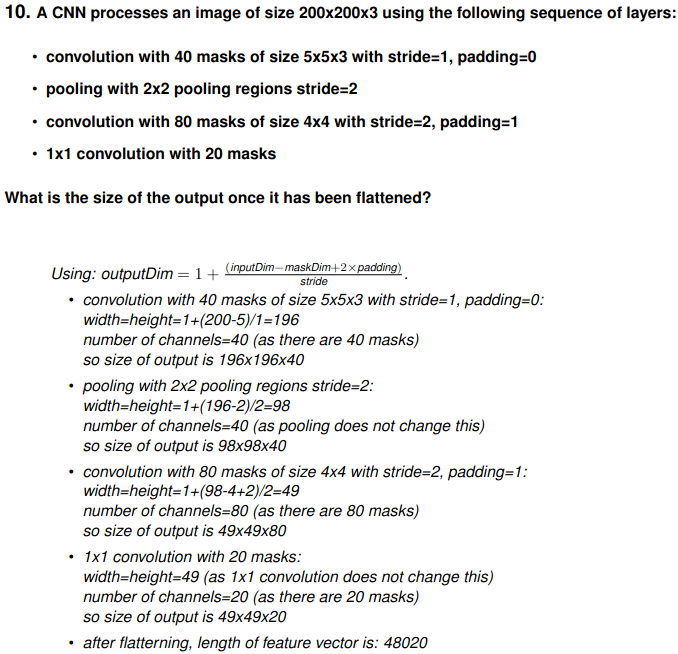

## Week 6

### GAN - Deep Generative NN

In [ ]:
'''
    File name: deep-gen-neural-nets.py
    Author: Camil Abraham Hamanoiel Faure
            Anish Thekkan
    Date created: 26/05/2021
    Date last modified: 30/05/2021
    Python Version: 3.7
'''

import math as math
import sympy as sy

#
# NOTE: This script only works for k=1. Examples with different values
#       of k are not provided in the lecture or the tutorial.
#

# Change this variables according to the question
training_iterations = 1 # Number of training iterations.
x_real = [[1,2],[3,4]] # Real samples
x_fake = [[5,6],[7,8]] # Generated samples
    # Both x_real and x_fake must have the same number of 
    # samples for part b to work

theta = [0.1,0.2] # Initial parameters of discriminator

prob_real = 0.5 # Probability of real samples to be selected
prob_fake = 0.5 # Probability of generated samples to be selected
    # In Tutorial 7 Q.3 each sample has the same probability,
    # that is why the current value is 0.5 for both

learning_rate = 0.02 # Part b Q.3 says that learning rate is 0.02 but
                    # it can be changed to the desired value

# DO NOT change this variables
# ----------------------------
# Here, symbols are created for each variable so that
# the discriminator function can be differentiated and
# evaluated with different values
n = len(x_real[0]) 
x = [None] * n
t = [None] * n
for i in range(n):
    name = 'x'+str(i)
    x[i] = sy.Symbol(name)
    name = 't'+str(i)
    t[i] = sy.Symbol(name)
# ----------------------------

# Change this according to the problem's discriminator function
discriminator_function = 1/(1+ math.e**-(t[0]*x[0] - t[1]*x[1] - 2))
    # The discriminator function can be changed to any function needed.
    # 
    # Note that the variables MUST be expressed as t[i] and x[i] 
    # where:
    # 't' is a list containig variables for the parameters of Discriminator (Theta)
    # 'x' is a list containig variables for each attribute of each sample
    # 'i' is the number of the attribute and parameter used in that case
    # 
    # i.e. for the equation: "θ1*x1" 
    # then above it should be written: "t[0]*x[0]"
    # because python lists start in 0

# *****DO NOT CHANGE CODE BELOW THIS LINE********
#
m = len(x_real)
m_fake = len(x_fake)

#
# Because it is discrete we don't need to find integrals here when computing expectations
#
print('************')
print('*****GAN****')
print('************')

#
# Tutorial 7 Question 3 part a
#
for iter in range(training_iterations):
    print ('\n--Start of',str(iter+1)+"°",'training iteration.--')
    V_D = 0 # Discriminator Value 

    # This for is to obtain the discriminator value
    for i in range(m):
        xx = x_real[i]
        res_discr_funct = discriminator_function
        for j in range(n):
            # .subs() is a function that replaces the x[i] and t[i] variables of the 
            # discriminant function with the actual values of the theta and real samples
            # given in the problem
            res_discr_funct = res_discr_funct.subs(x[j],xx[j]).subs(t[j],theta[j])
        V_D += prob_real*math.log(res_discr_funct)


    print('\n***** PART A ****\n')

    print('\nThe Discriminator value is', V_D)

    V_G = 0 # Generator Value

    # This for is to obtain the generator value
    for i in range(m_fake):
        xx = x_fake[i]
        res_discr_funct = discriminator_function
        for j in range(n):
            # .subs() is a function that replaces the x[i] and t[i] variables of the 
            # discriminant function with the actual values of the theta and real samples
            # given in the problem
            res_discr_funct = res_discr_funct.subs(x[j],xx[j]).subs(t[j],theta[j])
        V_G += prob_fake*math.log(1 - res_discr_funct)
        
    print('\nThe Generator value is', V_G)

    V_DG = V_D + V_G

    print('\nThe Computed V_DG is ', V_DG)

    #
    # Tutorial 7 Question 3 part b
    #

    print('\n\n*********************')
    print('***** PART B ****\n')

    alpha_beta = [[0] * n] * m
    for i in range(m):
        xx = x_real[i]
        xx_bar = x_fake[i]
        # Two different equations are needed. One with x_real[i] and another with
        # x_fake[i]. This is explained in the tutorial solutions.
        discriminator_function_xx = discriminator_function
        discriminator_function_xx_bar = discriminator_function
        for j in range(n):
            discriminator_function_xx = discriminator_function_xx.subs(x[j],xx[j])
            discriminator_function_xx_bar = discriminator_function_xx_bar.subs(x[j],xx_bar[j])

        learning_equation = sy.log(discriminator_function_xx) 
        learning_equation += sy.log(1 - discriminator_function_xx_bar)
        
        differential_equation = [None] * n
        # The learning equation is differentiated in this for
        for j in range(n):
            differential_equation[j] = learning_equation.diff(t[j])
            # After differentiating the learning equation, the next for replaces
            # thetha variables with the actual values to obtain the result
            for k in range(n):
                differential_equation[j] = differential_equation[j].subs(t[k],theta[k])
        # The result of the differentiated equations is added to a list
        alpha_beta[i] = differential_equation

    # Alpha and beta are added together to obtain delta
    delta_theta = [0] * n
    for i in range(n):
        delta_theta[i] = 0
        for j in range(m):
            print( 'Alpha and Beta', i+1,j+1, 'is', alpha_beta[j][i])
            delta_theta[i] += (1/m)*alpha_beta[j][i]

    print( '\nDelta is ', delta_theta,'\n')

    # Lastly, delta is added to the current theta values to obtain the new
    # theta values after training
    for i in range(n):
        theta[i] = theta[i] + learning_rate*delta_theta[i]
        print('New theta',i+1   ,'is',theta[i])
    print ('\n--End of',str(iter+1)+"°",'training iteration.--')
print ('\n\n---------End of the script.---------')

## Week 7

### Oja's rule
Code

In [5]:
  
import numpy as np

# Oja's Learning rule 
# through Mizan 
# this code works out zero-mean data so please enter the raw feature vectors as given in the question
# Tutorial 7, question 7

## -----------------------------------------------------------------------
# ONLY CHANGE THESE 3 INPUTS AND CHANGE THE NUMBER OF EPOCH YOU WANT WHEN APPLYING THE FUNCTION(Oja_learning_rule)
input_from_question = np.array([[[0,1]],[[3,5]],[[5,4]],[[5,6]],[[8,7]],[[9,7]]])
weight_x = np.array([[-1,0]])
learning_rate = 0.01
epochs = 6
## -----------------------------------------------------------------------

# we are going to perform Oja's learning on the input_vectors
input_vectors = []

mean_of_data = input_from_question.mean(axis=0)
for i in input_from_question:
    zero_mean_data = i - mean_of_data
    input_vectors.append(zero_mean_data)
    

def Oja_learning_rule(epoch):
    weight_update = np.copy(weight_x)  
    for i in range(1,epoch+1):
        df = pd.DataFrame({"x": [i for i in input_vectors]})
        df['y'] = df['x'].apply(lambda x: np.dot(x,weight_update.T))
        df['x - yw'] = df['x'].apply(lambda x: np.round(x, 4)) - df['y'].apply(lambda y: y * (weight_update))  
        df['ny(x -yw)'] = learning_rate * df['y'].apply(lambda y: y) * df['x - yw'].apply(lambda x: x)
        #Rounding the numbers         
        df['y'] = df['y'].apply(lambda y: np.round(y,4))
        df['x - yw'] =  df['x - yw'].apply(lambda x: np.round(x,4))
        df['ny(x -yw)']  = df['ny(x -yw)'].apply(lambda x: np.round(x,4))
        sum_of_weights = df['ny(x -yw)'].sum()
        weight_update = weight_update + sum_of_weights   
        display(df)
        print(f'after {i} epoch Total weight change is: {sum_of_weights}')
        print(f'after {i} epoch our weights are: {weight_update}')


Oja_learning_rule(epochs)

### PCA
code

In [ ]:
import numpy as np
from scipy.linalg import svd


def _PCA(ip, n_components, data_to_project=None):
    ip = np.array(ip)
    ip_mean = np.mean(ip, axis=1)
    ip_prime = ip - np.vstack(ip_mean)
    C = (ip_prime @ ip_prime.T) / ip.shape[1]
    V, D, VT = svd(C)
    ans = VT @ ip_prime
    print("-"*100)
    print("READ THE ROWS FROM THE TOP")
    print(ans[:n_components])
    print("-"*100)
    if data_to_project:
        data_to_project = np.array(data_to_project)
        print("-"*100)
        print(f"PROJECTION OF {data_to_project}")
        print((VT@data_to_project)[:n_components])
        print("-"*100)

run

In [ ]:
# REPLACE ACCORDING TO THE QUESTION
ip = [[4, 0, 2, -2], [2, -2, 4, 0], [2, 2, 2, 2]]
n_components = 2
data_to_project = [3, -2, 5]
_PCA(ip=ip, n_components=n_components, data_to_project=data_to_project)

### Fisher's Method

code

In [ ]:
import numpy as np


def fishers(ip, weights, classes):
    ip = np.array(ip)
    N, D = ip.shape
    weights = np.array(weights)
    m1 = []
    m2 = []
    for idx in range(N):
        if classes[idx] == 1:
            m1.append(ip[idx])
        else:
            m2.append(ip[idx])
    m1 = np.mean(m1, axis=0)
    m2 = np.mean(m2, axis=0)

    # between cluster distance
    sb = []
    sw = []
    for w in (weights):
        d = (w @ (m1-m2)) ** 2
        sb.append(d)
    # calculate within cluster distance
    sw = []
    for w in weights:
        running_sw = 0
        for idx in range(len(ip)):
            if classes[idx] == 1:
                running_sw += (w.T @ (ip[idx] - m1)) ** 2

            elif classes[idx] == 2:
                running_sw += (w.T @ (ip[idx] - m2)) ** 2
        sw.append(running_sw)
        # print(running_sw)
    print("SB: ")
    print(sb)
    print("SW: ")
    print(sw)
    cost = []
    for _sb, _sw in zip(sb, sw):
        cost.append(_sb/_sw)
    print("Cost: ")
    print(cost)

    print("-"*100)
    print(f"{weights[np.argmax(cost)]} has high PROJECTION COST")


run

In [ ]:
ip = [[1, 2], [2, 1], [3, 3], [6, 5], [7, 8]]
classes = [1, 1, 1, 2, 2]
weights = [[-1, 5], [2, -3]]
fishers(ip, weights, classes)

### Sparse Coding
code

In [ ]:
import numpy as np


def main(p, VT, x, _lambda):
    p = np.array(p)
    VT = np.array(VT)
    x = np.array(x)
    r_error = []
    for p in projections:
        val = x - VT @ p
        r_error.append(np.linalg.norm(val) + _lambda*np.count_nonzero(p))
    print("RECONSTRUCTION ERRORS: ")
    print(r_error)
    print(projections[np.argmin(r_error)], " for sparse coding")


run

In [ ]:
# REPLACE ACCORDING TO THE QUESTION
# projections are nothing but y

projections = [[1, 2, 0, -1], [0, 0.5, 1, 0]]
x = [[2, 3]]
VT = [[1, 1, 2, 1], [-4, 3, 2, -1]]
main(p=projections, VT=VT, x=x, _lambda=1)

## Week 8

### SVM(to find lambda, weights and margin)

#### Code

In [27]:
class SVM:
    def fit(X, y, support_vectors, support_vector_class):
        X = np.array(X)
        y = np.array(y)

        print("-"*100)
        w = []
        for idx in range(len(support_vectors)):
            w.append(support_vectors[idx] * support_vector_class[idx])
        w = np.array(w)
        eq_arr = []
        for idx, sv in enumerate(support_vectors):
            tmp = ((w @ sv) * support_vector_class[idx])
            tmp = np.append(tmp, [support_vector_class[idx]])
            eq_arr.append(tmp)
        eq_arr.append(np.append(support_vector_class, [0]))
        rhs_arr = [1] * len(support_vector_class)
        rhs_arr.extend([0])
        rhs_arr = np.array(rhs_arr)
        ans = rhs_arr @ np.linalg.inv(eq_arr)
        print("lambda and w_0 values are ", ans)
        final_weight = []
        for idx in range(w.shape[0]):
            final_weight.append(w[idx] * ans[idx])
        final_weight = np.array(final_weight)
        final_weight = np.sum(final_weight, axis=0)
        print("Weights: ")
        print(final_weight)
        print("Margin: ")
        print(2/np.linalg.norm(final_weight))
        print("-"*100)
            
    def setParams():
        X = transformToList(input("Enter features eg [[3, 1], [3, -1], [7, 1], [8, 0], [1, 0], [0, 1], [-1, 0], [-2, 0]] 2D:  "))
        y = transformToList(input("Enter labels eg [1, 1, 1, 1, -1, -1, -1, -1] 1D:  "))
        support_vectors = np.array(transformToList(input("Enter features eg [[3, 1], [3, -1], [1, 0]] 2D:  "))).astype(np.float)
        support_vector_class = np.array(transformToList(input("Enter labels eg [1, 1, -1] 1D:  "))).astype(np.float)
            
        return X, y, support_vectors, support_vector_class

#### Run

In [28]:
X, y, support_vectors, support_vector_class = SVM.setParams()
SVM.fit(X, y, support_vectors, support_vector_class)

Enter features eg [[3, 1], [3, -1], [7, 1], [8, 0], [1, 0], [0, 1], [-1, 0], [-2, 0]] 2D:  [[3, 1], [3, -1], [7, 1], [8, 0], [1, 0], [0, 1], [-1, 0], [-2, 0]]
Enter labels eg [1, 1, 1, 1, -1, -1, -1, -1] 1D:  [1, 1, 1, 1, -1, -1, -1, -1]
Enter features eg [[3, 1], [3, -1], [1, 0]] 2D:  [[3, 1], [3, -1], [1, 0]]
Enter labels eg [1, 1, -1] 1D:  [1, 1, -1]
----------------------------------------------------------------------------------------------------
lambda and w_0 values are  [ 0.25  0.25  0.5  -2.  ]
Weights: 
[1.00000000e+00 1.38777878e-16]
Margin: 
1.9999999999999996
----------------------------------------------------------------------------------------------------


## Week 9

### AdaBooster

In [ ]:
import math
import numpy as np

# NOTE you can use if for Q1 c in tutorial9

def run_adaBooster_setup():
    """ Ask the user to enter the needed parameters
    """  
    print("Please insert the dataset. Each sample should be divided by a space and each coordinate within a sample should be divided by a coma. \nBe careful not to enter spaces after the coma that separates the samples' coordinates.\n")
    print("I.E.: x1=[1,2], x2=[-3,4], x3=[5,3] would be ---> 1,2 -3,4 5,3 \n")
    dataset_input = str(input())
    dataset = np.array([]).reshape(0,2)
    samples = dataset_input.split(' ')
    for sample in samples:
        coordinates = sample.split(',')
        coordinates = np.array([float(c) for c in coordinates])
        dataset = np.concatenate((dataset, [coordinates]))
    print("\n")
    print("Please insert the labels (y) of each sample in the dataset. \nYou should provide a sequential list of y where each y is separated by a single space.")
    print("I.E. +1 -1 +1 -1")
    labels = [ int(o) for o in str(input()).split(' ')] 
    print("\n")
    print("Please insert the number of weak classifiers:")
    n_classifiers = int(input())
    print("\n")
    thresholds = np.array([])
    for i in range(0, n_classifiers):
        print(f"Please insert the decision threshold for weak classifier {i+1} so that it classify a sample to be +1:")
        print("I.E.: x1 > 0")
        print("I.E.: x2 > 3")
        print("I.E.: x1 >= -4")
        thresholds = np.concatenate((thresholds, [str(input())]))
        print('\n')
    print("Please enter the target training error (when the adaboost should terminate). This should be normalised to the total number of samples:")
    print("I.E.: 0 -> if you want to stop it when the classifier classifies correctly all the training samples.")
    print("I.E.: 0.25 -> if you want to stop it when the classifier classifies correctly 75\% of the samples.")
    target_error = int(input())
    print("\n")
    print("Please enter the maximum number of iterations you want the algorithm to run for:")
    max_iterations = int(input())
    print("\n")
    return dataset, labels, n_classifiers, thresholds, target_error, max_iterations


# Decision stump used as weak classifier
class DecisionStump():
    def __init__(self, id, threshold=None):
        self.threshold = threshold
        self.id = id


    def predict(self, sample):
        if '>' in self.threshold:
            terms = self.threshold.split(' ')
            axis_in_condition = [int(c) - 1 for c in terms[0] if c.isdigit()]
            if sample[axis_in_condition[0]] > float(terms[2]):
                return 1
            else:
                return -1
        elif '<' in self.threshold:
            terms = self.threshold.split(' ')
            axis_in_condition = [int(c) - 1 for c in terms[0] if c.isdigit()]
            if sample[axis_in_condition[0]] < float(terms[2]):
                return 1
            else:
                return -1
        elif '<=' in self.threshold:
            terms = self.threshold.split(' ')
            axis_in_condition = [int(c) - 1 for c in terms[0] if c.isdigit()]
            if sample[axis_in_condition[0]] <= float(terms[2]):
                return 1
            else:
                return -1
        elif '>=' in self.threshold:
            terms = self.threshold.split(' ')
            axis_in_condition = [int(c) - 1 for c in terms[0] if c.isdigit()]
            if sample[axis_in_condition[0]] >= float(terms[2]):
                return 1
            else:
                return -1


class Adaboost():

    def __init__(self, n_clf, thresholds, target_error, max_iterations=10):
        self.n_clf = n_clf
        self.clfs = np.array([])
        for i in range (0, len(thresholds)):
            self.clfs = np.concatenate(( self.clfs, [DecisionStump(i+1, thresholds[i])] ))
        # self.alpha = 0
        self.alpha = []
        self.target_error = target_error
        self.max_iterations = max_iterations
        self.best_classifiers = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights to 1/N
        w = np.full(n_samples, (1 / n_samples))

        iteration = 1
        while True:
            print(f"Iteration {iteration}: \nWeights: {w}")

            # Iterate through classifiers and find the best one
            lowest_error = 100000000
            best_classifier = 0
            for i in range(0, self.n_clf):
                clf = self.clfs[i]
                # Calculate Error
                err = 0
                for j, sample in enumerate(X):
                    prediction = clf.predict(sample)
                    error = 0 if prediction == y[j] else 1
                    err += error * w[j]
                if err < lowest_error:
                    lowest_error = err
                    best_classifier = i

            self.best_classifiers.append(self.clfs[best_classifier])
            print(f"Best classifier: {best_classifier+1}")

            # Get predictions from best classifer for each sample
            predictions = []
            for j, sample in enumerate(X):
                prediction = self.clfs[best_classifier].predict(sample)
                predictions.append(prediction)

            # Calculate weighted training error of best classifier
            weighted_error = 0
            for i, prediction in enumerate(predictions):
                # error += 0 if prediction == y[i] else 1
                w_e = 0 if prediction == y[i] else 1
                w_e *= w[i]
                weighted_error += w_e
            error /= len(y)
            print(f"Best classifier's weighted training error: {weighted_error}")


            # Calculate Alpha
            EPS = 1e-10
            alpha = 0.5 * np.log((1.0 - lowest_error) / (lowest_error))
            self.alpha.append(alpha)
            print(f"Alpha: {alpha}")

            # Calculate weights for next iteration
            new_w = []
            for i, weight in enumerate(w):
                new_w.append(w[i] * (np.exp(- alpha * y[i] * predictions[i])))
                print(f"Update weight: W{iteration}(sample{i+1})*e^-alpha{iteration}*y{i+1}*h{iteration}(sample{i+1}) ----> {w[i] * (np.exp(- alpha * y[i] * predictions[i]))}")
            # Normalize to one
            Z_normalisation = 0
            for i, weight in enumerate(new_w):
                Z_normalisation += weight
            for i, weight in enumerate(new_w):
                new_w[i] /= Z_normalisation
            print(f"Normalisation Z{iteration} when updating new weights: {Z_normalisation}")
            # Update weights for next iteration
            w = new_w



            # Check if the classifier has reached the desired target error
            # Find the output*alpha of each classifier for each sample
            tot_error = 0
            decision_formula = ''
            sample_classifications = np.zeros((X.shape[0], len(self.alpha)))
            for i, alpha in enumerate(self.alpha):  
                clf = self.best_classifiers[i]
                for j, sample in enumerate(X):
                    prediction = clf.predict(sample)
                    sample_classifications[j][i] = alpha if prediction == y[j] else -alpha
                decision_formula += f"{alpha} * h{clf.id}(x) + "
            # Calculate the AdaBooster classification error in this round
            sample_classifications = sample_classifications.sum(axis=1)
            for i, classification in enumerate(sample_classifications):
                classification = 1 if classification >= 0 else -1
                tot_error += 1/X.shape[0] if classification == y[j] else 0
            print(f"AdaBoost Classifier in this round: {decision_formula[:-2]}")
            print(f"AdaBoost Classifier (unweighted) error in this round: {tot_error}")
            # If the error is below our target error stop the execution
            if tot_error <= self.target_error:
                print('\n')
                print(f"The final hard classifier is: sgn({decision_formula[:-2]})")
                return

            # If we have reached the max iterations stop the execution
            if iteration >= self.max_iterations:
                return
            iteration += 1
            print("\n")



    def predict(self, sample):
        tot_error = 0
        sample_classifications = np.zeros((1, len(self.alpha)))
        for i, alpha in enumerate(self.alpha):  
            clf = self.best_classifiers[i]
            prediction = clf.predict(sample)
            sample_classifications[0][i] = alpha if prediction == 1 else -alpha
        # Calculate the AdaBooster classification error in this round
        sample_classifications = sample_classifications.sum(axis=1)
        return 1 if sample_classifications[0] >= 0 else -1

#### Run

In [ ]:
if __name__ == '__main__':
    dataset, labels, n_classifiers, thresholds, target_error, max_iterations = run_adaBooster_setup()
    classifier = Adaboost(n_classifiers, thresholds, target_error, max_iterations)
    classifier.fit(dataset, labels)

    while True:
        print("\nEnter a new sample (separating its coordinates with a coma and not including spaces) to predict or simply enter quit()")
        sample = str(input())
        if sample == 'quit()':
            quit()
        result = classifier.predict([float(c) for c in sample.split(',')])
        print(f"The AdaBoost classifier classified it as {result}")

## Week 10

### Competitive learning

In [ ]:
import math
import numpy as np

def run_competitive_learning_setup():
    """ Ask the user to enter the needed parameters for competitive learning.
    Returns:
        [string, np.array, np.array, float, np.array]: 
                             mode -> Specify if using normalisation or not.
                             dataset -> The dataset to cluster.
                             clusters -> The coordinates of the initial centroids
                             lr -> The learning Rate 
                             order_of_indexes -> The order to follow when selecting samples in the algorithm
    """    
    print("How you want to run the algorithm? (Enter the corresponding number and press ENTER)")
    print("1) With normalisation and argumentation")
    print("2) Without normalisation and argumentation")
    mode = int(input())
    algorithm_variants = {1: "with norm", 2:"without norm"}
    mode = algorithm_variants.get(mode)
    print("\n")
    print("Please insert the dataset. Each sample should be divided by a space and each coordinate within a sample should be divided by a coma. \nBe careful not to enter spaces after the coma that separates the samples' coordinates.\n")
    print("I.E.: x1=[1,2], x2=[-3,4], x3=[5,3] would be ---> 1,2 -3,4 5,3 \n")
    dataset_input = str(input())
    print("\n")
    dataset = np.array([]).reshape(0,2)
    samples = dataset_input.split(' ')
    for sample in samples:
        coordinates = sample.split(',')
        coordinates = np.array([float(c) for c in coordinates])
        dataset = np.concatenate((dataset, [coordinates]))
    print("Please insert the initial centroids. Each centroid should be divided by a space and each coordinate within a centroid should be divided by a coma. \nBe careful not to enter spaces after the coma that separates the centroids' coordinates.\n")
    print("I.E.: c1=[1,2], c2=[-3,4], c3=[5,3] would be ---> 1,2 -3,4 5,3 \n")
    centroids_input = str(input())
    print("\n")
    clusters = np.array([]).reshape(0,2)
    centroids = centroids_input.split(' ')
    for centroid in centroids:
        coordinates = centroid.split(',')
        coordinates = np.array([float(c) for c in coordinates])
        clusters = np.concatenate((clusters, [coordinates]))
    print("Please insert the value of the Learning Rate and then press ENTER (make sure it is a float number - I.E. 0.1)")
    lr = float(input())
    print("\n")
    print("Please insert the order to follow when selecting the samples within the algorithm. \nYou should provide a sequential list of the indexes of the samples to select separated by single spaces.")
    print("I.E. 1 2 1 5 3")
    print("NOTE: indexes start at 1!")
    order_of_indexes = [ int(o) - 1 for o in str(input()).split(' ')]
    print ("\n")
    return mode, dataset, clusters, lr, order_of_indexes


class CompetitiveLearning:
    """ This class can be used to execute problems regarding Competitive Learning
    """ 
    def __init__(self, mode, dataset, clusters, lr, order_of_samples):
        self.mode = mode # Indicates wether to use normalisation or not. Either "with norm" or "without norm"
        self.dataset = dataset # Dataset of type np.array([[x11, x12], [x12, x22],...,[x1n, x2n]])
        self.centroids = clusters # Initial clusters of type np.array([[x11, x12], [x12, x22],...,[x1n, x2n]])
        self.lr = lr # Learning rate. Must be a float > 0
        self.order_of_samples = order_of_samples # Indicates what order to select the samples in the algorithm. 
                                                # Of type np.array([int, int, int]) where each int is the corresponding index to the sample in self.dataset

    def run(self):
        """Runs the algorithm on the samples listed in self.order_of_samples.
            After that, the user can select some more operations to do with the updated clusters.
        """        
        if self.mode == "with norm":
            self.run_with_normalisation()
        elif self.mode == "without norm":
            self.run_without_normalisation()
        user_input = 0
        while user_input != 3:
            # While the user doesnt selects exit show some options.
            # NOTE only applicable when in "without norm" mode.
            if user_input == 1:
                self.classify_samples()
            elif user_input == 2:
                self.classify_new_data()

            print("What do you want to do now?")
            print("1) Classify all the existing samples")
            print("2) Classify a new sample")
            print("3) Exit")
            user_input = int(input())

    def run_with_normalisation(self):
        augmented_dataset = np.array([np.insert(sample, 0, 1) for sample in self.dataset])
        normalised_dataset = np.array([np.divide(sample, np.linalg.norm(sample)) for sample in augmented_dataset])
        augmented_centroids = np.array([np.insert(sample, 0, 1) for sample in self.centroids])

        print(f"The augmented dataset is :{augmented_dataset}")
        print(f"The normalised dataset is :{normalised_dataset}\n")
        for iteration, i in enumerate(self.order_of_samples):
            x = normalised_dataset[i]
            print(f"Iteration {iteration+1}:")
            print(f"Selected x{i+1} {self.dataset[i]} which normalised is --> {x}")

            net_inner_products = np.array([np.multiply(c.transpose(), x) for c in augmented_centroids])
            print(f"The inner products to each centroid with respect to x{i+1} are {net_inner_products}")
            j = np.argmax(np.sum(net_inner_products, axis=1))

            rhino_centroid = augmented_centroids[j]
            print(f"The selected centroid is c{j+1} {rhino_centroid}, with a net inner product to {x} of {net_inner_products[j]}")
            
            # Update Rhino Centroid
            rhino_centroid = np.add(rhino_centroid, np.multiply([self.lr], x))
            print(f"Updated Centroid c{j+1} with respect to x{i+1}: {rhino_centroid}")
            # Normalise Rhino Centroid
            rhino_centroid = np.divide(rhino_centroid, np.linalg.norm(rhino_centroid))
            print(f"Normalised Centroid c{j+1} with respect to x{i+1}: {rhino_centroid} \n")
            augmented_centroids[j] = rhino_centroid

        self.centroids = augmented_centroids
        print(f"The final Centroids are: {self.centroids}\n")
    
    def run_without_normalisation(self):
        for iteration, i in enumerate(self.order_of_samples):
            print(f"Iteration {iteration+1}:")
            x = self.dataset[i]

            distances_to_centroids = np.array([np.linalg.norm(x - c) for c in self.centroids])
            j = distances_to_centroids.argmin()

            rhino_centroid = self.centroids[j]
            print(f"The selected centroid is c{j+1} {rhino_centroid}, with a distance of {distances_to_centroids[j]} to {x}")
            
            # Update Rhino Centroid
            rhino_centroid = np.add(rhino_centroid, np.multiply([self.lr], np.subtract(x, rhino_centroid)))
            self.centroids[j] = rhino_centroid
            print(f"Updated Centroid with respect to x{i+1}: {rhino_centroid} \n")
        print(f"The final Centroids are: {self.centroids}\n")
    
    def classify_samples(self):
        """Prints what cluster each sample belongs to.
            NOTE Only works in 'without norm' mode
        """ 
        if self.mode == 'without norm':
            for j, sample in enumerate(self.dataset):
                minimum_distance = None
                closest_centroid_index = None
                for i, centroid in enumerate(self.centroids):
                    dist = np.linalg.norm(sample - centroid)
                    if not minimum_distance or minimum_distance > dist:
                        minimum_distance = dist
                        closest_centroid_index = i
                print(f"Sample x{j+1} {sample} belongs to cluster c{closest_centroid_index+1} {self.centroids[closest_centroid_index]}")
            print("\n")
        elif self.mode == 'with norm':
            print("This feature is not available in mode \"with normalisation\". No examples were given.")
            print("\n")

    
    def classify_new_data(self):
        """Asks the user to input a new sample to classify and says what cluster it belongs to.
            NOTE Only works in 'without norm' mode
        """        
        if self.mode == 'without norm':
            print("Please insert the new sample to classify. Do not insert spaces and divide its coordinates with a coma")
            new_sample = np.array([float(c) for c in str(input()).split(',')])
            print('\n')
            minimum_distance = None
            closest_centroid_index = None
            for i, centroid in enumerate(self.centroids):
                dist = np.linalg.norm(new_sample - centroid)
                if not minimum_distance or minimum_distance > dist:
                    minimum_distance = dist
                    closest_centroid_index = i
            print(f"The new sample {new_sample} belongs to cluster c{closest_centroid_index+1} {self.centroids[closest_centroid_index]}")
        elif self.mode == 'with norm':
            print("This feature is not available in mode \"with normalisation\". No examples were given.")
            print("\n")

#### RUN

In [ ]:
if __name__ == '__main__':
    # Competitive Algorithm. NOTE youll be asked to enter all the parameters when executing the script
    mode, dataset, clusters, lr, order_of_indexes = run_competitive_learning_setup()
    cluster = CompetitiveLearning(mode, dataset, clusters, lr, order_of_indexes)
    cluster.run()

### Hierarchical Clustering

In [ ]:
import math
import numpy as np

def run_hierarchical_clustering_setup():
    """ Ask the user to enter the needed parameters for hierarchical clustering
    Returns:
        [int, np.array, string]: c -> the number of classes to cluster.
                             dataset -> The dataset to cluster.
                             similarity_method -> the distancing method to use.
    """    
    print("Please enter the number of clusters you want to divide the dataset in and then press ENTER: ")
    c = int(input())
    print("\n")
    print("Please insert the dataset. Each sample should be divided by a space and each coordinate within a sample should be divided by a coma. \n Be careful not to enter spaces after the coma that separates the samples' coordinates.")
    print("I.E.: x1=[1,2], x2=[-3,4], x3=[5,3] would be ---> 1,2 -3,4 5,3")
    dataset_input = str(input())
    print("\n")
    dataset = []
    samples = dataset_input.split(' ')
    for sample in samples:
        coordinates = sample.split(',')
        coordinates = [float(c) for c in coordinates]
        dataset.append(coordinates)
    print("Please type the number corresponding to the similarity method to use and press ENTER:")
    print("1) Single-link")
    print("2) Complete-link")
    print("3) Group-average")
    print("4) Centroid")
    similarity_method = int(input())
    print("\n")
    similarity_options = {1: "single-link", 2:"complete-link", 3:"group-average", 4: "centroid"}
    similarity_method = similarity_options.get(similarity_method)
    return c, dataset, similarity_method


class HierarchicalClustering():
    """ This class can be used to execute problems regarding Hierarchical Clustering
    """    
    def __init__(self, n_classes, dataset, similarity_method="single-link"):
        self.n = n_classes # Number of classes that need to be found
        self.dataset = dataset # Dataset of type np.array([[x11, x12], [x12, x22],...,[x1n, x2n]])
        self.similarity_method = similarity_method # either "single-link", "complete-link", "group-average", or "centroid"
        self.clusters = [np.array([s]) for s in self.dataset] # The initial clusters of type np.array([[x11, x12], [x12, x22],...,[x1n, x2n]])

    def run(self):
        """Run hierarchical clustering on the dataset to find self.n number of clusters.
        """        
        iteration = 1
        while(len(self.clusters) != self.n):
            closest_clusters = None
            closest_distance = None
            # Find the two closest clusters
            for i, cluster in enumerate(self.clusters):
                closest_cluster_to_i, distance_to_i = self.find_closest_cluster(i) #TODO
                if not closest_distance or distance_to_i < closest_distance:
                    closest_clusters = [i, closest_cluster_to_i]
                    closest_distance = distance_to_i
            
            # Merge closest_clusters
            merged_clusters = [self.clusters[closest_clusters[0]], self.clusters[closest_clusters[1]]]
            self.merge_clusters(closest_clusters[0], closest_clusters[1])
            self.print_iteration(iteration, merged_clusters, closest_distance)
            iteration += 1
        self.print_final()

    def find_closest_cluster(self, cluster_index):
        """Find the the cluster closest to self.clusters[cluster_index] according to a given similarity method.
        Args:
            cluster_index (int): The index of the cluster in self.cluster
        Returns:
            ((int, float)): A pair containing the index of the cluster closest to self.clusters[cluster_index] and its distance.
        """        
        closest_cluster_index = None
        closest_distance = None
        for i, cluster in enumerate(self.clusters):
            similarity_method_options = {"single-link": lambda: self.get_single_link_distance(self.clusters[cluster_index], self.clusters[i]),
                                            "complete-link": lambda: self.get_complete_link_distance(self.clusters[cluster_index], self.clusters[i]),
                                            "group-average": lambda: self.get_average_link_distance(self.clusters[cluster_index], self.clusters[i]),
                                            "centroid": lambda: self.get_centroid_distance(self.clusters[cluster_index], self.clusters[i])}
            if cluster_index != i:
                func = similarity_method_options.get(self.similarity_method, lambda: "Invalid")
                distance = func()
                if not closest_distance or distance < closest_distance:
                    closest_cluster_index = i
                    closest_distance = distance

        return closest_cluster_index, closest_distance


            
    def get_single_link_distance(self, cluster_a, cluster_b):
        minimum_distance = None
        for a in cluster_a:
            for b in cluster_b:
                dist = np.linalg.norm(a-b)
                if not minimum_distance or minimum_distance > dist:
                    minimum_distance = dist
        return minimum_distance 

    def get_complete_link_distance(self, cluster_a, cluster_b):
        maximum_distance = None
        for a in cluster_a:
            for b in cluster_b:
                dist = np.linalg.norm(a-b)
                if not maximum_distance or maximum_distance < dist:
                    maximum_distance = dist
        return maximum_distance 
    
    def get_average_link_distance(self, cluster_a, cluster_b):
        distances = np.array([])
        for a in cluster_a:
            for b in cluster_b:
                dist = np.linalg.norm(a-b)
                distances = np.append(distances, np.array([dist]))
        return np.average(distances) 

    def get_centroid_distance(self, cluster_a, cluster_b):
        centroid_a = np.average(cluster_a) 
        centroid_b = np.average(cluster_b) 
        dist = np.linalg.norm(centroid_a - centroid_b)
        return dist 
    
    def merge_clusters(self, cluster_index_a, cluster_index_b):
        merged_cluster = np.concatenate((self.clusters[cluster_index_a], self.clusters[cluster_index_b]))
        self.clusters = [self.clusters[i] for i in range(0, len(self.clusters)) if i != cluster_index_a and i != cluster_index_b]
        self.clusters.append(merged_cluster)

    def print_iteration(self, i, merged_clusters, distance):
        print(f"End of iteration {str(i)} " )
        print(f"Merged clusters {merged_clusters[0]} and {merged_clusters[1]}. Distance between the clusters was {distance}.")
        print(f"There are {str(len(self.clusters))} clusters:")
        for j, c in enumerate(self.clusters):
            print(f"Cluster {j} -> {self.clusters[j]}")
        print ("\n")
    
    def print_final(self):
        print("FINAL CLUSTERS:")
        for j, c in enumerate(self.clusters):
            print(f"Cluster {j} -> {self.clusters[j]}")


#### Run

In [ ]:
if __name__ == '__main__':
    # Hierarchical Clustering Exercise. NOTE youll be asked to enter all the parameters when executing the script
    c, dataset, similarity_method = run_hierarchical_clustering_setup()
    cluster = HierarchicalClustering(c, dataset, similarity_method)
    cluster.run()

### K-Means

In [ ]:
import numpy as np

# Initialisation - Parameters from question
k = 2 # Number of clusters to form
centers = {  # Initial clusters' centers
    0: [-1, 3],
    1: [5, 1],
}

x = np.array([  # Dataset
    [-1, 3],
    [1, 4],
    [0, 5],
    [4, -1],
    [3, 0],
    [5, 1]
])

try:
    assert(k == len(centers))
except AssertionError as e:
    e.args += ('The number of initialised clusers doesn\'t match k',
               len(centers), k)
    raise

print(
    f'The parameters are: k = {k} and the centers are {centers}')

# -----------------------------------------------------------------------------------


def distance(feature, centers, method='euclidian'):
    if method == 'euclidian':
        return [np.linalg.norm(feature-centers[center])  # euclidian norm
                for center in centers]
    if method == 'manhatan':
        return [np.linalg.norm(feature-centers[center], 1)  # manhatan dist
                for center in centers]


previous = {}
for i in range(5):  # Max number of iterations (I don't think we'd be expected to perform more than 5 iterations)
    print(f'\n Iteration number {i+1}: \n')
    classes = {}  # Dict to hold a list of data points that are closest to the cluster number
    for j in range(k):
        classes[j] = []  # Instantiate empty list at every iteration
    for feature in x:  # For each data point do:
        # Compute the distance to each cluster (options: euclidian or manhatan)
        distances = distance(feature, centers, 'euclidian')

        classification = distances.index(
            min(distances))  # Find the lowest distance
        # Assign the datapoint to that cluster
        classes[classification].append(feature)

    # Print to which cluster each data point belongs to
    print(f'The classification is: {classes}')

    previous = centers.copy()  # Copy the cluster centers dict
    print(f'The previous centers are:{previous}')
    for classification in classes:
        # Compute the new cluster average by taking the mean of all the data point assigned to that cluster
        centers[classification] = np.average(classes[classification], axis=0)
    print(f'The new centers are:{centers}')

    opti = True
    for center in centers:
        prev = previous[center]  # Previous cluster
        curr = centers[center]  # Update cluster
        # termination criteria #TODO: IMPORTANT: This can be changed in the exam question!!
        if np.sum(curr-prev) != 0:
            opti = False
    if opti:
        break

print('\n The algorithm converged!')

### K-Fuzzy Means

In [ ]:
import numpy as np


def fuzzy_k_means(data, K, b, iterations, weights):
    data = np.array(data)
    weights = np.array(weights)
    centers = [None] * K
    # centers = np.array(centers)
    data = np.array(data)
    for _iter in range(iterations):
        # calculate centers
        for idx, w in enumerate(weights):
            new_center = [None] * data.shape[1]
            for idy in range(data.shape[1]):
                new_center[idy] = w[idy]**b * data[:, idy]
            centers[idx] = (np.array(new_center).sum(axis=0)/(w**b).sum())
        # print("Centers", centers)
        new_weight_container = [None] * data.shape[1]
        for idx in range(data.shape[1]):
            new_weights = []
            for c in centers:
                val = np.linalg.norm(c - data[:, idx])

                val = (1 / val) ** (2/(b-1))
                new_weights.append(val)
            new_weights = np.array(new_weights)
            nw_sum = new_weights.sum()
            for idy, nw in enumerate(new_weights):
                new_weights[idy] = nw/nw_sum
            new_weight_container[idx] = new_weights

        new_weight_container = np.array(new_weight_container)
        for col_idx in range(new_weight_container.shape[1]):
            weights[col_idx] = new_weight_container[:, col_idx]
        print(F"CENTERS AFTER ITERATION {_iter+1} [READ COLUMN WISE]")
        print(np.array(centers).T)
        print("#"*100)
        print(f"WEIGHTS AFTER ITERATION {_iter + 1} [READ COLUMN WISE]")
        print(weights.T)
        print("-"*100)

#### Run

In [ ]:
# REPLACE A VALUES AS GIVEN IN THE QUESTION
data = [[-1, 1, 0, 4, 3, 5], [3, 4, 5, -1, 0, 1]]
fuzzy_k_means(data=data, K=2, weights=[
              [1, 0.5, 0.5, 0.5, 0.5, 0], [0, 0.5, 0.5, 0.5, 0.5, 1]], b=2, iterations=3)

### Leader-Follower

In [1]:
import math
import numpy as np

def run_leader_follower_setup():
    """ Ask the user to enter the needed parameters
    Returns:
        [string, np.array, float, float, np.array]: 
                             mode -> Specify if using normalisation or not.
                             dataset -> The dataset to cluster.
                             lr -> The learning Rate 
                             theta -> The threshold theta.
                             order_of_indexes -> The order to follow when selecting samples in the algorithm
    """    
    print("How you want to run the algorithm? (Enter the corresponding number and press ENTER)")
    print("1) With normalisation and argumentation")
    print("2) Without normalisation and argumentation")
    mode = int(input())
    algorithm_variants = {1: "with norm", 2:"without norm"}
    mode = algorithm_variants.get(mode)
    print("\n")
    print("Please insert the dataset. Each sample should be divided by a space and each coordinate within a sample should be divided by a coma. \nBe careful not to enter spaces after the coma that separates the samples' coordinates.\n")
    print("I.E.: x1=[1,2], x2=[-3,4], x3=[5,3] would be ---> 1,2 -3,4 5,3 \n")
    dataset_input = str(input())
    print("\n")
    dataset = np.array([]).reshape(0,2)
    samples = dataset_input.split(' ')
    for sample in samples:
        coordinates = sample.split(',')
        coordinates = np.array([float(c) for c in coordinates])
        dataset = np.concatenate((dataset, [coordinates]))
    print("Please insert the value of the learning rate and then press ENTER (make sure it is a float number - I.E. 0.1)")
    lr = float(input())
    print("\n")
    print("Please insert the value of the the threshold theta and then press ENTER (make sure it is a float number - I.E. 2.0)")
    theta = float(input())
    print("\n")
    print("Please insert the order to follow when selecting the samples within the algorithm. \nYou should provide a sequential list of the indexes of the samples to select separated by single spaces.")
    print("I.E. 1 2 1 5 3")
    print("NOTE: indexes start at 1!")
    order_of_indexes = [ int(o) - 1 for o in str(input()).split(' ')]
    print ("\n")
    return mode, dataset, lr, theta, order_of_indexes


class LeaderFollower:
    """ This class can be used to execute problems regarding Leader Follower
    """ 
    def __init__(self, mode, dataset, lr, theta, order_of_samples):
        self.mode = mode # Indicates wether to use normalisation or not. Either "with norm" or "without norm"
        self.dataset = dataset # Dataset of type np.array([[x11, x12], [x12, x22],...,[x1n, x2n]])
        self.lr = lr # Learning rate. Must be a float > 0
        self.theta = theta # The threshold to use in the algorithm.
        self.order_of_indexes = order_of_indexes # Indicates what order to select the samples in the algorithm. 
                                                # Of type np.array([int, int, int]) where each int is the corresponding index to the sample in self.dataset
        self.centroids = np.array([]) # Empty np.array of initial centroids

    
    def run(self):
        """Runs the algorithm on the samples listed in self.order_of_samples.
            After that, the user can select some more operations to do with the updated clusters.
        """        
        if self.mode == "with norm":
            self.run_with_normalisation()
        elif self.mode == "without norm":
            self.run_without_normalisation()
        user_input = 0
        while user_input != 3:
            # While the user doesnt selects exit show some options.
            # NOTE only applicable when in "without norm" mode.
            if user_input == 1:
                self.classify_samples()
            elif user_input == 2:
                self.classify_new_data()

            print("What do you want to do now?")
            print("1) Classify all the existing samples")
            print("2) Classify a new sample")
            print("3) Exit")
            user_input = int(input())

    def run_without_normalisation(self):
        # Shape the list of centroid to the right shape
        self.centroids = np.array([]).reshape(0, self.dataset.shape[1])
        # Initialise first centroid
        self.centroids = np.concatenate( (self.centroids, [self.dataset[self.order_of_indexes[0]]]) )
        for iteration, i in enumerate(self.order_of_indexes):
            x = self.dataset[i]
            print(f"Iteration {iteration}:")
            print(f"Selected x{i+1} {x}")

            distances_to_centroids = np.array([np.linalg.norm(x - c) for c in self.centroids])
            print(f"Distances to each centroids are {distances_to_centroids}")
            j = distances_to_centroids.argmin()
            rhino_centroid = self.centroids[j]
            print(f"The closest centroid is c{j+1} {rhino_centroid}")

            if np.linalg.norm(x - rhino_centroid) < self.theta:
                print(f"C{j+1} is within the threshold")
                self.centroids[j] = np.add( rhino_centroid, np.multiply(self.lr, np.subtract(x, rhino_centroid)) )
                print(f"Updated centroid c{j+1} to be {self.centroids[j]}\n")
            else:
                print(f"C{j+1} is not within the threshold")
                self.centroids = np.concatenate( (self.centroids, [x]) )
                print(f"Added new Centroid {x}\n")
        
        print(f"The final Centroids are: {self.centroids}\n")

    def run_with_normalisation(self):

        augmented_dataset = np.array([np.insert(sample, 0, 1) for sample in self.dataset])
        normalised_dataset = np.array([np.divide(sample, np.linalg.norm(sample)) for sample in augmented_dataset])

        print(f"The augmented dataset is :{augmented_dataset}")
        print(f"The normalised dataset is :{normalised_dataset}\n")

        # Shape the list of centroid to the right shape (it must be augmented)
        self.centroids = np.array([]).reshape(0, normalised_dataset.shape[1])

        # Initialise first centroid
        self.centroids = np.concatenate( (self.centroids, [normalised_dataset[self.order_of_indexes[0]]]) )

        for iteration, i in enumerate(self.order_of_indexes):
            x = normalised_dataset[i]
            print(f"Iteration {iteration + 1}:")
            print(f"Selected x{i+1} {self.dataset[i]} which normalised is --> {x}")

            net_inner_products = np.array([np.multiply(c.transpose(), x) for c in self.centroids])
            print(f"The inner products to each centroid with respect to x{i+1} are {net_inner_products}")
            j = np.argmax(np.sum(net_inner_products, axis=1))
            rhino_centroid = self.centroids[j]
            print(f"The closest centroid is c{j+1} {rhino_centroid}")

            if np.linalg.norm(x - rhino_centroid) < self.theta:
                print(f"C{j+1} is within the threshold, as {np.linalg.norm(x - rhino_centroid)} < {self.theta}")
                rhino_centroid = np.add(rhino_centroid, np.multiply([self.lr], x)) # Update cluster center
                print(f"Updated Centroid C{j+1} with respect to x{i+1}: {rhino_centroid}") 
                rhino_centroid = np.divide(rhino_centroid, np.linalg.norm(rhino_centroid)) # Normalise updated cluster center
                print(f"Normalised Centroid c{j+1} with respect to x{i+1}: {rhino_centroid} \n")
                self.centroids[j] = rhino_centroid # Actually update the new cetroid
            else:
                print(f"C{j+1} is not within the threshold, as {np.linalg.norm(x - rhino_centroid)} > {self.theta}")
                new_centroid = np.divide(x, np.linalg.norm(x)) # Create new centroid
                self.centroids = np.concatenate( (self.centroids, [new_centroid]) )
                print(f"Added new centroid c{len(self.centroids - 1)} {new_centroid}")
        
        print(f"The final Centroids are: {self.centroids}\n")

    def classify_samples(self):
        if self.mode == 'without norm':
            for j, sample in enumerate(self.dataset):
                minimum_distance = None
                closest_centroid_index = None
                for i, centroid in enumerate(self.centroids):
                    dist = np.linalg.norm(sample - centroid)
                    if not minimum_distance or minimum_distance > dist:
                        minimum_distance = dist
                        closest_centroid_index = i
                print(f"Sample x{j+1} {sample} belongs to cluster c{closest_centroid_index+1} {self.centroids[closest_centroid_index]}")
            print("\n")
        elif self.mode == 'with norm':
            print("This feature is not available in mode \"with normalisation\". No examples were given.")
            print("\n")

    
    def classify_new_data(self):
        if self.mode == 'without norm':
            print("Please insert the new sample to classify. Do not insert spaces and divide its coordinates with a coma")
            new_sample = np.array([float(c) for c in str(input()).split(',')])
            print('\n')
            minimum_distance = None
            closest_centroid_index = None
            for i, centroid in enumerate(self.centroids):
                dist = np.linalg.norm(new_sample - centroid)
                if not minimum_distance or minimum_distance > dist:
                    minimum_distance = dist
                    closest_centroid_index = i
            print(f"The new sample {new_sample} belongs to cluster c{closest_centroid_index+1} {self.centroids[closest_centroid_index]}")
        elif self.mode == 'with norm':
            print("This feature is not available in mode \"with normalisation\". No examples were given.")
            print("\n")

#### Run

In [ ]:
if __name__=='__main__':
    # Leader follower algorithm.  NOTE youll be asked to enter all the parameters when executing the script
    mode, dataset, lr, theta, order_of_indexes = run_leader_follower_setup()
    cluster = LeaderFollower(mode, dataset, lr, theta, order_of_indexes)
    cluster.run()

### PCA

In [ ]:
import numpy as np
from scipy.linalg import svd


def _PCA(ip, n_components, data_to_project=None):
    ip = np.array(ip)
    ip_mean = np.mean(ip, axis=1)
    ip_prime = ip - np.vstack(ip_mean)
    C = (ip_prime @ ip_prime.T) / ip.shape[1]
    V, D, VT = svd(C)
    ans = VT @ ip_prime
    print("-"*100)
    print("READ THE ROWS FROM THE TOP")
    print(ans[:n_components])
    print("-"*100)
    if data_to_project:
        data_to_project = np.array(data_to_project)
        print("-"*100)
        print(f"PROJECTION OF {data_to_project}")
        print((VT@data_to_project)[:n_components])
        print("-"*100)

#### Run

In [ ]:
# REPLACE ACCORDING TO THE QUESTION
ip = [[4, 0, 2, -2], [2, -2, 4, 0], [2, 2, 2, 2]]
n_components = 2
data_to_project = [3, -2, 5]
_PCA(ip=ip, n_components=n_components, data_to_project=data_to_project)